In [152]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error
import fbprophet as fb
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/electric_consumption.csv')
df1 = df.copy()
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.



Development Name Borough Account Name Location Meter AMR   Meter Scope  \
0            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
1            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
2            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
3            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   
4            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   

   TDS #  EDP  RC Code Funding Source         AMP #               Vendor Name  \
0  118.0  248  B011800        FEDERAL  NY005001180P  NEW YORK POWER AUTHORITY   
1  118.0  248  B011800        FEDERAL  NY005001180P  NEW YORK POWER AUTHORITY   
2  118.0  248  B011800        FEDERAL  NY005001180P  NEW YORK POWER AUTHORITY   
3  118.0  248  B011800        FEDERAL  NY005001180P  NEW YORK POWER AUTHORITY   
4  118.0  248  B011800        FEDERAL  NY005001180P  NEW YORK POWER AUTHORITY   

   UMIS BILL ID Revenue Month Service Start Date Service End Date  # days  \
0       1842037       2010-01         12/24/2009       01/26/2010    33.0   
1       1844205       2010-02         01/26/2010       02/25/2010    30.0   
2       1841378       2010-03         02/25/2010       03/26/2010    29.0   
3       1847148       2010-04         03/26/2010       04/26/2010    31.0   
4       1848672       2010-05         04/26/2010       05/24/2010    28.0   

  Meter Number Estimated  Current Charges   Rate Class Bill Analyzed  \
0      7223256         N         15396.82  GOV/NYC/068           Yes   
1      7223256         N         14556.34  GOV/NYC/068           Yes   
2      7223256         N         13904.98  GOV/NYC/068           Yes   
3      7223256         N         14764.04  GOV/NYC/068           Yes   
4      7223256         N         13729.54  GOV/NYC/068           Yes   

   Consumption (KWH)  KWH Charges  Consumption (KW)  KW Charges  Other charges  
0             128800      7387.97             216.0      2808.0        5200.85  
1             115200      6607.87             224.0      2912.0        5036.47  
2             103200      5919.55             216.0      2808.0        5177.43  
3             105600      6057.22             208.0      2704.0        6002.82  
4              97600      5598.34             216.0      2808.0        5323.20

In [154]:
df.shape

(362630, 27)

In [155]:
## we can use account name as a unique identifier

In [156]:
df.info()
## need to change the datetime columns from object to datetime:
## Revenue Month, Service Start Date, Service End Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362630 entries, 0 to 362629
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    361947 non-null  object 
 1   Borough             362630 non-null  object 
 2   Account Name        362630 non-null  object 
 3   Location            353112 non-null  object 
 4   Meter AMR           362476 non-null  object 
 5   Meter Scope         19106 non-null   object 
 6   TDS #               360690 non-null  float64
 7   EDP                 362630 non-null  int64  
 8   RC Code             362630 non-null  object 
 9   Funding Source      362630 non-null  object 
 10  AMP #               360744 non-null  object 
 11  Vendor Name         362630 non-null  object 
 12  UMIS BILL ID        362630 non-null  int64  
 13  Revenue Month       362630 non-null  object 
 14  Service Start Date  362622 non-null  object 
 15  Service End Date    362622 non-nul

In [157]:
for n in ['Revenue Month' , 'Service Start Date' , 'Service End Date']:
  df[n] = pd.to_datetime(df[n])

In [158]:
## Getting daily averages
df['Consumption (KWH) Daily'] = np.nan
df['Consumption (KWH) Daily'] = np.round(df['Consumption (KWH)']/df['# days'],0)

In [159]:
## Getting monthly and yearly averages

In [160]:
monthly = df.groupby(pd.PeriodIndex(df['Revenue Month'], freq="M"))['Consumption (KWH)'].mean().reset_index().rename(columns = {'Consumption (KWH)' : 'Consumption (KWH) Monthly'})
monthly['Revenue Month'] = monthly['Revenue Month'].apply(lambda i: str(i).replace(' M', '')).apply(lambda i: pd.to_datetime(i))
yearly = df.groupby(pd.PeriodIndex(df['Revenue Month'], freq="Y"))['Consumption (KWH)'].mean().reset_index().rename(columns = {'Consumption (KWH)' : 'Consumption (KWH) Yearly',
                                                                                                                                                      'Revenue Month' : 'Revenue Year'})
yearly['Revenue Year'] = yearly['Revenue Year'].apply(lambda i: str(i).replace(' Q', '')).apply(lambda i: pd.to_datetime(i))

daily = df[['Service Start Date' , 'Consumption (KWH) Daily']]
## this is to get the averages for the monthly and yearly accounts on KWH

In [161]:
daily.head()

Service Start Date  Consumption (KWH) Daily
0         2009-12-24                   3903.0
1         2010-01-26                   3840.0
2         2010-02-25                   3559.0
3         2010-03-26                   3406.0
4         2010-04-26                   3486.0

In [162]:
monthly.head()

Revenue Month  Consumption (KWH) Monthly
0    2010-01-01               45446.030782
1    2010-02-01               38808.144583
2    2010-03-01               36667.210941
3    2010-04-01               36808.514463
4    2010-05-01               36933.632880

In [163]:
yearly.head()

Revenue Year  Consumption (KWH) Yearly
0   2010-01-01              44612.137796
1   2012-01-01              36346.207317
2   2013-01-01              32702.755515
3   2014-01-01              30694.267709
4   2015-01-01              30726.874515

In [164]:
yearly.shape

(10, 2)

In [165]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Revenue Month              110 non-null    datetime64[ns]
 1   Consumption (KWH) Monthly  110 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [166]:
yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Revenue Year              10 non-null     datetime64[ns]
 1   Consumption (KWH) Yearly  10 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


In [167]:
## model fitting
df_daily = daily[['Service Start Date' , 'Consumption (KWH) Daily']].rename(columns = {'Service Start Date' : 'ds',
                                                                             'Consumption (KWH) Daily' : 'y'})
df_daily = df_daily.dropna()

In [168]:

df_monthly = monthly[['Revenue Month' , 'Consumption (KWH) Monthly']].rename(columns = {'Revenue Month' : 'ds',
                                                                             'Consumption (KWH) Monthly' : 'y'})

In [169]:
#!pip install prophet

In [170]:
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

In [171]:
m = Prophet()
m.fit(df_daily)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [172]:
future_daily100 = m.make_future_dataframe(periods=100, freq = 'D')
future_daily200 = m.make_future_dataframe(periods=200, freq = 'D')
future_daily365 = m.make_future_dataframe(periods=365, freq = 'D')

forecast_daily100 = m.predict(future_daily100)
forecast_daily100_metric = forecast_daily100.merge(df_daily, on = 'ds')
forecast_daily200 = m.predict(future_daily200)
forecast_daily200_metric = forecast_daily200.merge(df_daily, on = 'ds')
forecast_daily365 = m.predict(future_daily365)
forecast_daily365_metric = forecast_daily365.merge(df_daily, on = 'ds')

In [173]:
forecast_daily100[['ds' , 'yhat']].tail(20)

ds         yhat
668 2021-04-18  4679.928051
669 2021-04-19   816.179701
670 2021-04-20   801.356968
671 2021-04-21   825.521107
672 2021-04-22   823.335375
673 2021-04-23   850.179362
674 2021-04-24  3765.347743
675 2021-04-25  4745.583136
676 2021-04-26   860.662050
677 2021-04-27   822.047166
678 2021-04-28   820.471027
679 2021-04-29   791.352044
680 2021-04-30   790.890199
681 2021-05-01  3679.245027
682 2021-05-02  4634.046093
683 2021-05-03   725.955495
684 2021-05-04   667.296261
685 2021-05-05   649.612320
686 2021-05-06   609.061575
687 2021-05-07   602.490068

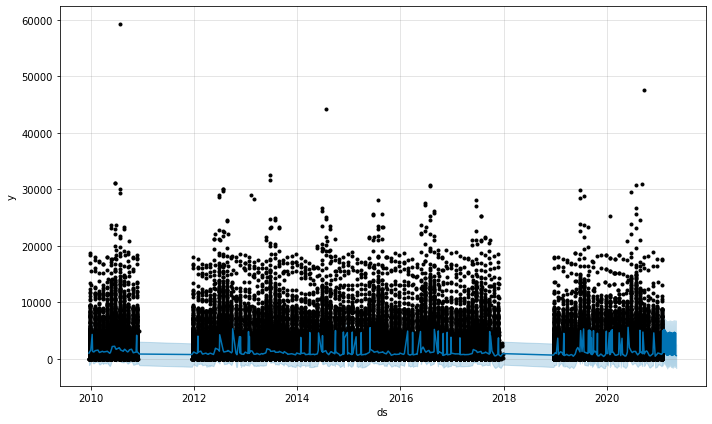

In [174]:
fig1 = m.plot(forecast_daily100)

In [175]:
print('r2 score:',r2_score(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))

r2 score: 0.023330782286116403
mean absolute percentage error: 1.4990121924372803e+18
mean_absolute_error: 1049.2480287694543


In [176]:
forecast_daily200[['ds' , 'yhat']].tail(20)

ds         yhat
768 2021-07-27  1207.160409
769 2021-07-28  1163.918215
770 2021-07-29  1096.596935
771 2021-07-30  1062.162382
772 2021-07-31  3921.397537
773 2021-08-01  4852.394725
774 2021-08-02   926.104331
775 2021-08-03   854.954286
776 2021-08-04   830.406227
777 2021-08-05   788.349968
778 2021-08-06   785.184230
779 2021-08-07  3680.986608
780 2021-08-08  4653.023225
781 2021-08-09   771.317657
782 2021-08-10   747.292842
783 2021-08-11   771.351354
784 2021-08-12   778.295085
785 2021-08-13   823.431677
786 2021-08-14  3765.770092
787 2021-08-15  4781.555147

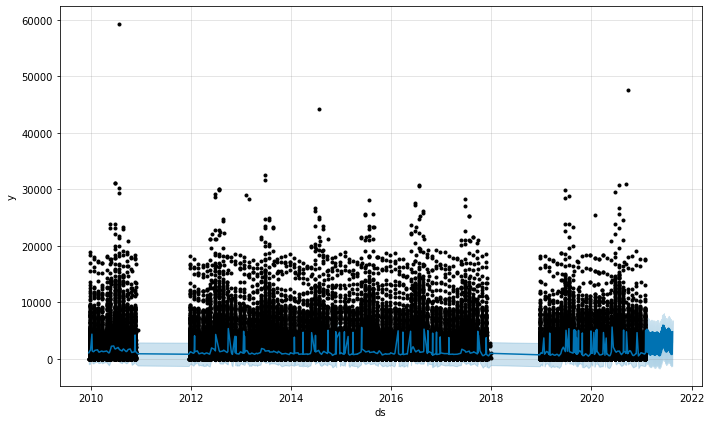

In [177]:
fig1 = m.plot(forecast_daily200)

In [178]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))

r2 score: 0.023330782286116403
mean absolute percentage error: 1.4990121924372805e+18
mean_absolute_error: 1049.2480287694543


In [179]:
forecast_daily365[['ds' , 'yhat']].tail(20)

ds         yhat
933 2022-01-08  3975.300375
934 2022-01-09  4930.407863
935 2022-01-10  1023.092076
936 2022-01-11   965.699320
937 2022-01-12   949.728763
938 2022-01-13   911.224933
939 2022-01-14   906.853515
940 2022-01-15  3797.063599
941 2022-01-16  4759.587027
942 2022-01-17   864.994694
943 2022-01-18   825.323881
944 2022-01-19   831.642367
945 2022-01-20   819.450787
946 2022-01-21   844.771032
947 2022-01-22  3767.323544
948 2022-01-23  4764.043790
949 2022-01-24   904.657388
950 2022-01-25   900.327506
951 2022-01-26   941.239790
952 2022-01-27   962.025812

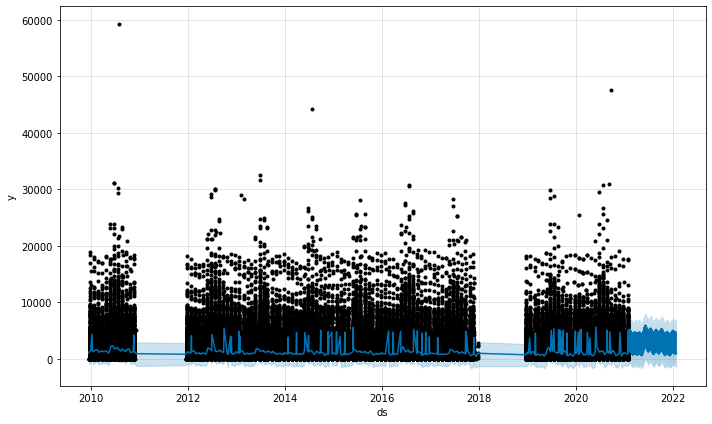

In [180]:
fig1 = m.plot(forecast_daily365)

In [181]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily365_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))

r2 score: 0.023330782286116403
mean absolute percentage error: 1.4990121924372803e+18
mean_absolute_error: 1049.2480287694543


In [182]:
m = Prophet()
m.fit(df_monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [183]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [184]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds          yhat
106 2020-11-01  24042.210400
107 2020-12-01  27255.248805
108 2021-01-01  27760.204242
109 2021-02-01  25303.377196
110 2021-02-28  22667.022062

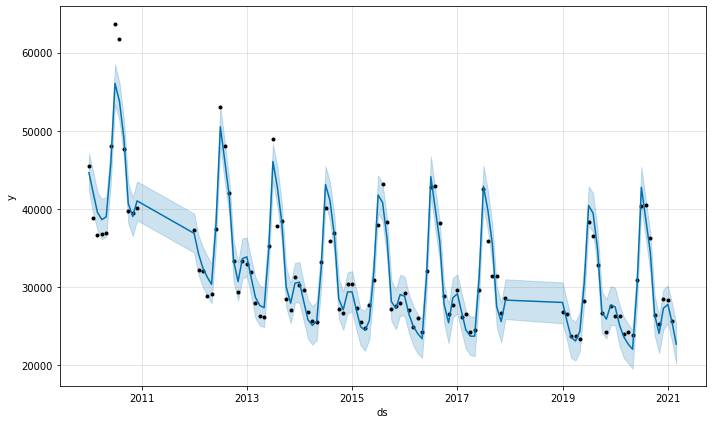

In [185]:
fig1 = m.plot(forecast_monthly1)

In [186]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error

In [187]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: 0.9353185862610729
mean absolute percentage error: 0.042575624283162535
mean_absolute_error: 1459.355781934247


In [188]:
forecast_monthly6[['ds' , 'yhat']].tail(7)

ds          yhat
109 2021-02-01  25303.377196
110 2021-02-28  22667.022062
111 2021-03-31  22499.604623
112 2021-04-30  24954.751440
113 2021-05-31  29955.199674
114 2021-06-30  37937.479389
115 2021-07-31  39128.024816

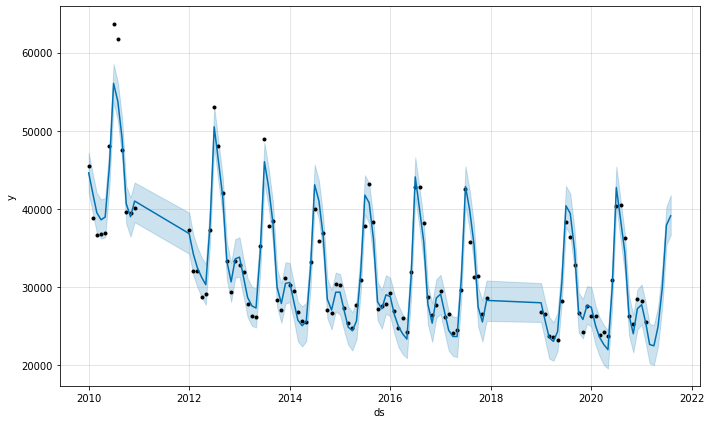

In [189]:
fig1 = m.plot(forecast_monthly6)

In [190]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: 0.9353185862610729
mean absolute percentage error: 0.042575624283162535
mean_absolute_error: 1459.355781934247


In [191]:
forecast_monthly9[['ds' , 'yhat']].tail(10)

ds          yhat
109 2021-02-01  25303.377196
110 2021-02-28  22667.022062
111 2021-03-31  22499.604623
112 2021-04-30  24954.751440
113 2021-05-31  29955.199674
114 2021-06-30  37937.479389
115 2021-07-31  39128.024816
116 2021-08-31  34228.902465
117 2021-09-30  26134.795874
118 2021-10-31  26193.778341

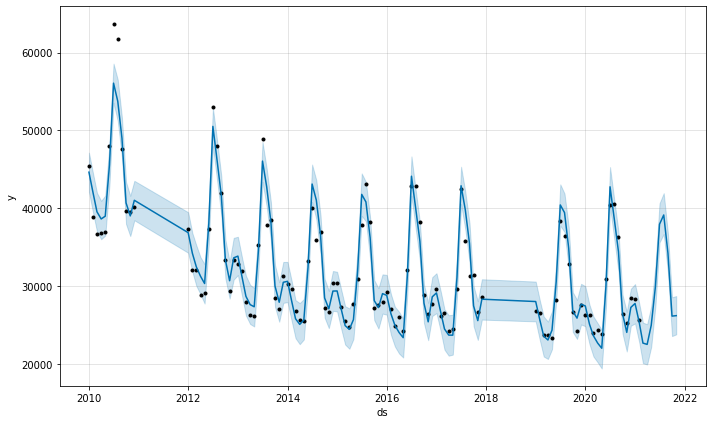

In [192]:
fig1 = m.plot(forecast_monthly9)

In [193]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: 0.9353185862610729
mean absolute percentage error: 0.042575624283162535
mean_absolute_error: 1459.355781934247


In [194]:
df_yearly = yearly[['Revenue Year' , 'Consumption (KWH) Yearly']].rename(columns = {'Revenue Year' : 'ds',
                                                                             'Consumption (KWH) Yearly' : 'y'})

In [195]:
m = Prophet()
m.fit(df_yearly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


In [196]:
future_yearly1 = m.make_future_dataframe(periods=1, freq = 'Y')
future_yearly10 = m.make_future_dataframe(periods=10, freq = 'Y')
future_yearly20 = m.make_future_dataframe(periods=20, freq = 'Y')

forecast_yearly1 = m.predict(future_yearly1)
forecast_yearly1_metric = forecast_yearly1.merge(df_yearly, on = 'ds')
forecast_yearly10 = m.predict(future_yearly10)
forecast_yearly10_metric = forecast_yearly10.merge(df_yearly, on = 'ds')
forecast_yearly20 = m.predict(future_yearly20)
forecast_yearly20_metric = forecast_yearly20.merge(df_yearly, on = 'ds')

In [197]:
forecast_yearly1[['ds' , 'yhat']].tail()

ds          yhat
6  2017-01-01  30090.684133
7  2019-01-01  27904.264536
8  2020-01-01  26697.610982
9  2021-01-01  25102.606704
10 2021-12-31  24057.530334

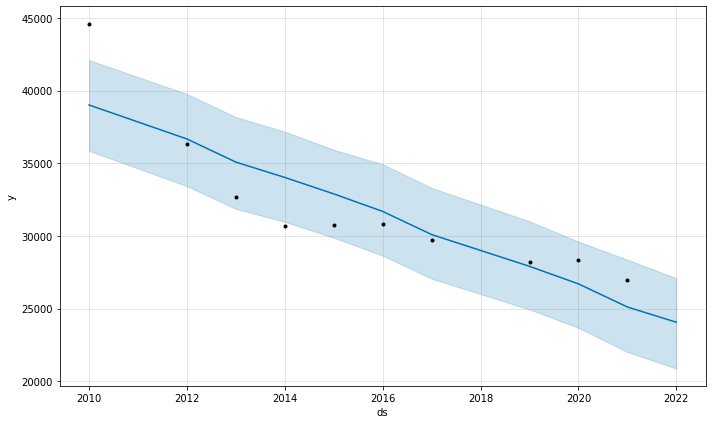

In [198]:
fig1 = m.plot(forecast_yearly1)

In [199]:
print('r2 score:',r2_score(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))

r2 score: 0.7522156704939462
mean absolute percentage error: 0.05612321066701052
mean_absolute_error: 1874.8624087187588


In [200]:
forecast_yearly10[['ds' , 'yhat']].tail(11)

ds          yhat
9  2021-01-01  25102.606704
10 2021-12-31  24057.530334
11 2022-12-31  22624.501552
12 2023-12-31  21116.607827
13 2024-12-31  20427.242016
14 2025-12-31  19069.452925
15 2026-12-31  17636.424143
16 2027-12-31  16128.530419
17 2028-12-31  15439.164607
18 2029-12-31  14081.375517
19 2030-12-31  12648.346735

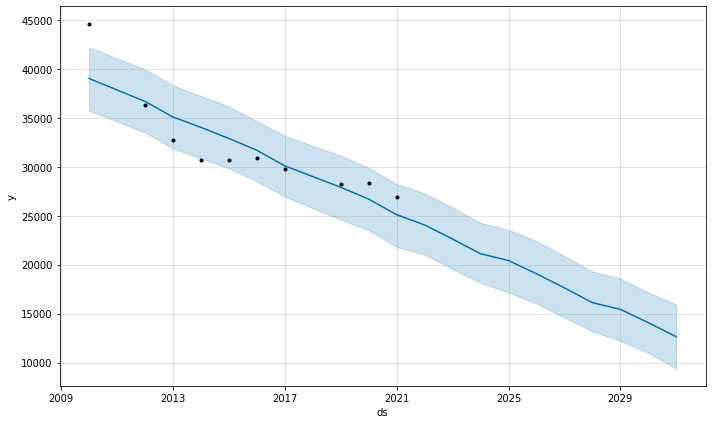

In [201]:
fig1 = m.plot(forecast_yearly10)

In [202]:
print('r2 score:',r2_score(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))

r2 score: 0.7522156704939462
mean absolute percentage error: 0.05612321066701052
mean_absolute_error: 1874.8624087187588


In [203]:
forecast_yearly20[['ds' , 'yhat']].tail()

ds         yhat
25 2036-12-31  5463.009790
26 2037-12-31  4105.220699
27 2038-12-31  2672.191917
28 2039-12-31  1164.298192
29 2040-12-31   474.932381

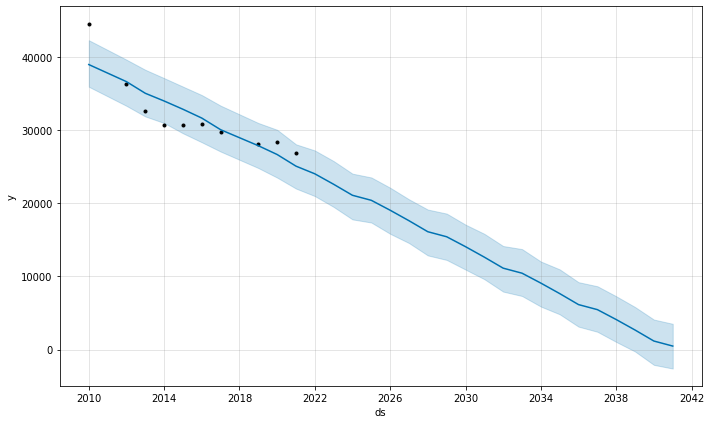

In [204]:
fig1 = m.plot(forecast_yearly20)

In [205]:
print('r2 score:',r2_score(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))

r2 score: 0.7522156704939462
mean absolute percentage error: 0.05612321066701052
mean_absolute_error: 1874.8624087187588


Modeling with Parameters - flat

In [206]:
m = Prophet(growth = 'flat')
m.fit(df_daily)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [207]:
future_daily100 = m.make_future_dataframe(periods=100, freq = 'D')
future_daily200 = m.make_future_dataframe(periods=200, freq = 'D')
future_daily365 = m.make_future_dataframe(periods=365, freq = 'D')

forecast_daily100 = m.predict(future_daily100)
forecast_daily100_metric = forecast_daily100.merge(df_daily, on = 'ds')
forecast_daily200 = m.predict(future_daily200)
forecast_daily200_metric = forecast_daily200.merge(df_daily, on = 'ds')
forecast_daily365 = m.predict(future_daily365)
forecast_daily365_metric = forecast_daily365.merge(df_daily, on = 'ds')

In [208]:
forecast_daily100[['ds' , 'yhat']].tail(20)

ds         yhat
668 2021-04-18  4234.572481
669 2021-04-19   582.048687
670 2021-04-20   564.201995
671 2021-04-21   697.281993
672 2021-04-22   731.463842
673 2021-04-23   863.411689
674 2021-04-24  3731.785845
675 2021-04-25  4730.945398
676 2021-04-26  1057.860970
677 2021-04-27  1008.757731
678 2021-04-28  1100.823475
679 2021-04-29  1085.437622
680 2021-04-30  1160.703972
681 2021-05-01  3966.920929
682 2021-05-02  4900.241779
683 2021-05-03  1159.540841
684 2021-05-04  1043.006789
685 2021-05-05  1069.799240
686 2021-05-06   993.225805
687 2021-05-07  1013.223760

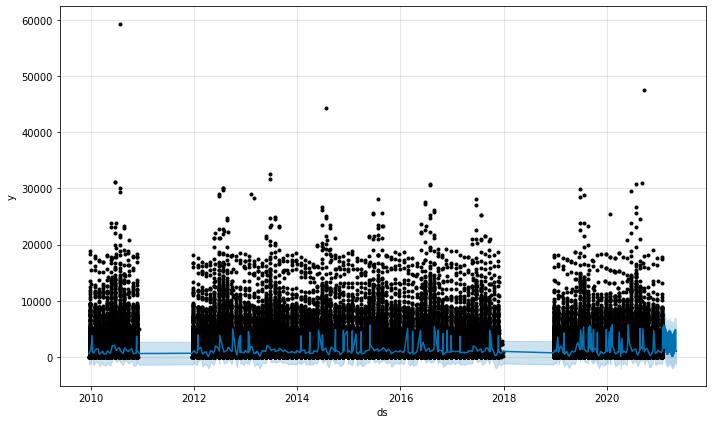

In [209]:
fig1 = m.plot(forecast_daily100)

In [210]:
print('r2 score:',r2_score(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))

r2 score: 0.016931423500307297
mean absolute percentage error: 1.5420079022547064e+18
mean_absolute_error: 1054.5245373203618


In [211]:
forecast_daily200[['ds' , 'yhat']].tail(20)

ds         yhat
768 2021-07-27  1107.757272
769 2021-07-28  1071.036581
770 2021-07-29   934.845334
771 2021-07-30   899.505277
772 2021-07-31  3607.256268
773 2021-08-01  4455.870719
774 2021-08-02   645.482614
775 2021-08-03   475.153282
776 2021-08-04   464.510588
777 2021-08-05   366.919098
778 2021-08-06   381.965434
779 2021-08-07  3150.893656
780 2021-08-08  4070.244055
781 2021-08-09   338.711631
782 2021-08-10   253.745685
783 2021-08-11   333.226368
784 2021-08-12   328.674842
785 2021-08-13   437.780328
786 2021-08-14  3299.877899
787 2021-08-15  4309.629455

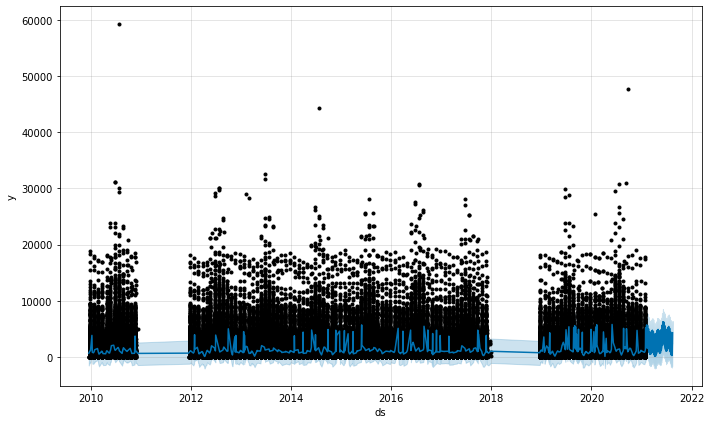

In [212]:
fig1 = m.plot(forecast_daily200)

In [213]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))

r2 score: 0.016931423500307297
mean absolute percentage error: 1.5420079022547064e+18
mean_absolute_error: 1054.5245373203618


In [214]:
forecast_daily365[['ds' , 'yhat']].tail(20)

ds         yhat
933 2022-01-08  3878.466425
934 2022-01-09  4776.215225
935 2022-01-10  1007.486748
936 2022-01-11   870.945839
937 2022-01-12   886.024370
938 2022-01-13   806.090744
939 2022-01-14   830.929084
940 2022-01-15  3602.163253
941 2022-01-16  4516.879494
942 2022-01-17   774.464516
943 2022-01-18   673.181120
944 2022-01-19   731.817958
945 2022-01-20   702.870887
946 2022-01-21   785.040059
947 2022-01-22  3618.677491
948 2022-01-23  4599.438401
949 2022-01-24   925.152468
950 2022-01-25   892.436330
951 2022-01-26  1018.383022
952 2022-01-27  1053.784852

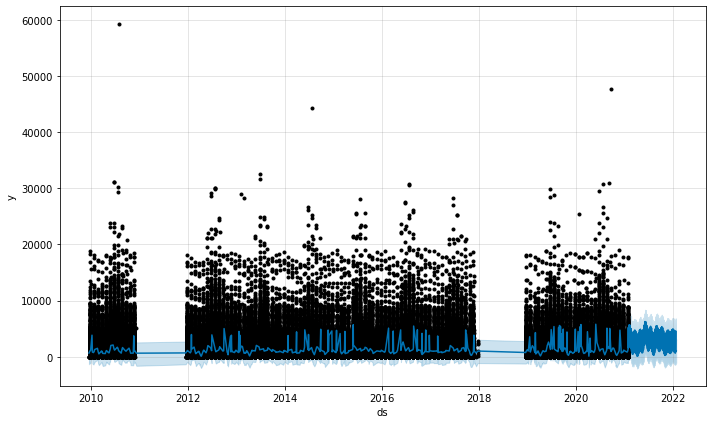

In [215]:
fig1 = m.plot(forecast_daily365)

In [216]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily365_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))

r2 score: 0.016931423500307297
mean absolute percentage error: 1.5420079022547064e+18
mean_absolute_error: 1054.5245373203618


In [217]:
m = Prophet(growth = 'flat')
m.fit(df_monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [218]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [219]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds          yhat
106 2020-11-01  27303.744011
107 2020-12-01  30392.610404
108 2021-01-01  32200.217349
109 2021-02-01  29573.668222
110 2021-02-28  27297.626370

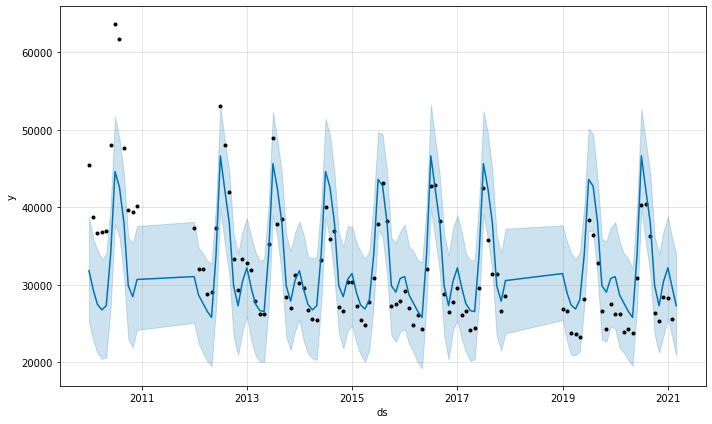

In [220]:
fig1 = m.plot(forecast_monthly1)

In [221]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: 0.5731285435193202
mean absolute percentage error: 0.10705693977713815
mean_absolute_error: 3711.8691551641878


In [222]:
forecast_monthly6[['ds' , 'yhat']].tail(7)

ds          yhat
109 2021-02-01  29573.668222
110 2021-02-28  27297.626370
111 2021-03-31  27147.251624
112 2021-04-30  29562.376061
113 2021-05-31  33972.219460
114 2021-06-30  41567.849483
115 2021-07-31  43138.091232

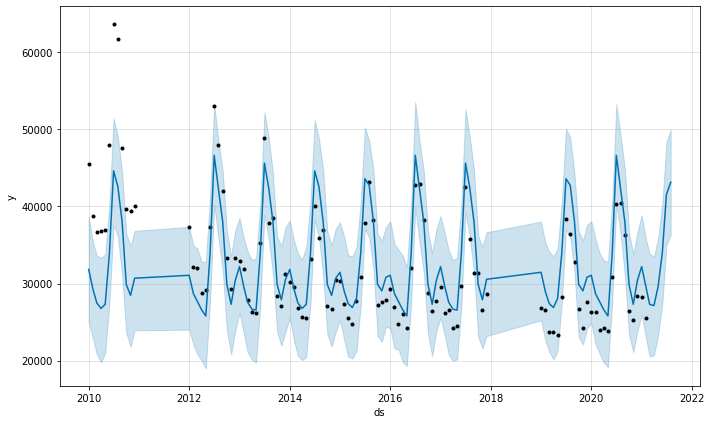

In [223]:
fig1 = m.plot(forecast_monthly6)

In [224]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: 0.5731285435193203
mean absolute percentage error: 0.10705693977713815
mean_absolute_error: 3711.8691551641878


In [225]:
forecast_monthly9[['ds' , 'yhat']].tail(10)

ds          yhat
109 2021-02-01  29573.668222
110 2021-02-28  27297.626370
111 2021-03-31  27147.251624
112 2021-04-30  29562.376061
113 2021-05-31  33972.219460
114 2021-06-30  41567.849483
115 2021-07-31  43138.091232
116 2021-08-31  38100.435925
117 2021-09-30  29932.960822
118 2021-10-31  30229.221371

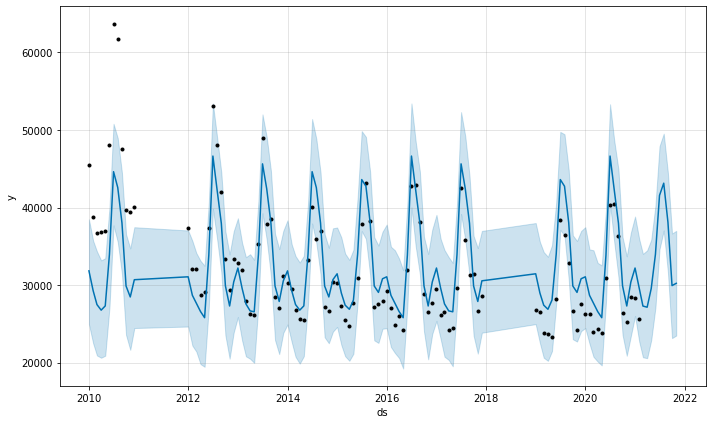

In [226]:
fig1 = m.plot(forecast_monthly9)

In [227]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: 0.5731285435193203
mean absolute percentage error: 0.10705693977713815
mean_absolute_error: 3711.8691551641878


In [228]:
m = Prophet(growth = 'flat')
m.fit(df_yearly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


In [229]:
future_yearly1 = m.make_future_dataframe(periods=1, freq = 'Y')
future_yearly10 = m.make_future_dataframe(periods=10, freq = 'Y')
future_yearly20 = m.make_future_dataframe(periods=20, freq = 'Y')

forecast_yearly1 = m.predict(future_yearly1)
forecast_yearly1_metric = forecast_yearly1.merge(df_yearly, on = 'ds')
forecast_yearly10 = m.predict(future_yearly10)
forecast_yearly10_metric = forecast_yearly10.merge(df_yearly, on = 'ds')
forecast_yearly20 = m.predict(future_yearly20)
forecast_yearly20_metric = forecast_yearly20.merge(df_yearly, on = 'ds')

In [230]:
forecast_yearly1[['ds' , 'yhat']].tail()

ds          yhat
6  2017-01-01  31722.207449
7  2019-01-01  32078.581667
8  2020-01-01  31940.545076
9  2021-01-01  31722.207449
10 2021-12-31  31033.590450

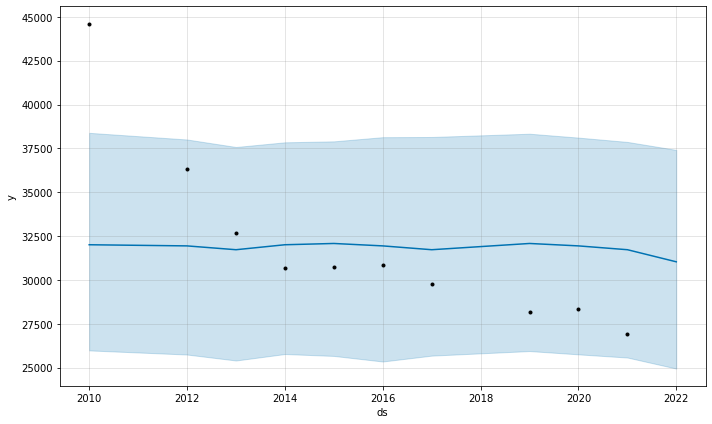

In [231]:
fig1 = m.plot(forecast_yearly1)

In [232]:
print('r2 score:',r2_score(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))

r2 score: 0.011331116592485757
mean absolute percentage error: 0.10646282203745419
mean_absolute_error: 3598.8955102631635


In [233]:
forecast_yearly10[['ds' , 'yhat']].tail(11)

ds          yhat
9  2021-01-01  31722.207449
10 2021-12-31  31033.590450
11 2022-12-31  30266.365409
12 2023-12-31  29291.693276
13 2024-12-31  31591.991620
14 2025-12-31  31033.590450
15 2026-12-31  30266.365409
16 2027-12-31  29291.693276
17 2028-12-31  31591.991620
18 2029-12-31  31033.590450
19 2030-12-31  30266.365409

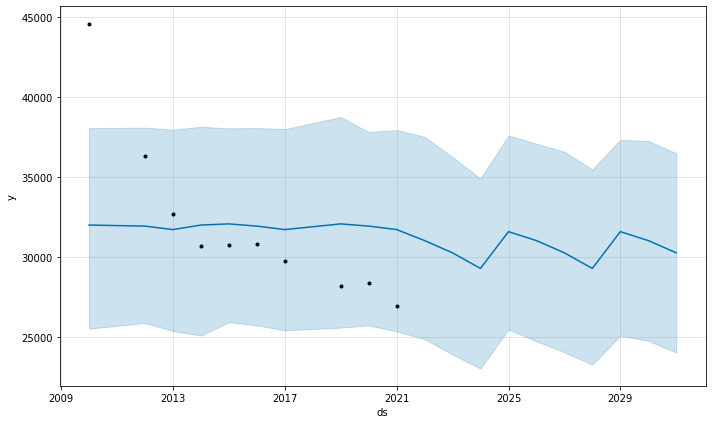

In [234]:
fig1 = m.plot(forecast_yearly10)

In [235]:
print('r2 score:',r2_score(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))

r2 score: 0.01133111659248598
mean absolute percentage error: 0.10646282203745419
mean_absolute_error: 3598.8955102631635


In [236]:
forecast_yearly20[['ds' , 'yhat']].tail()

ds          yhat
25 2036-12-31  31591.991620
26 2037-12-31  31033.590450
27 2038-12-31  30266.365409
28 2039-12-31  29291.693276
29 2040-12-31  31591.991620

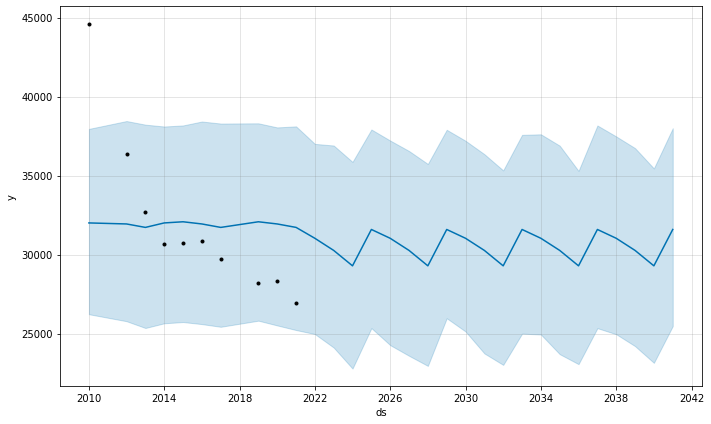

In [237]:
fig1 = m.plot(forecast_yearly20)

In [238]:
print('r2 score:',r2_score(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))

r2 score: 0.01133111659248598
mean absolute percentage error: 0.10646282203745419
mean_absolute_error: 3598.8955102631635


Modeling with Parameters - Logistic

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



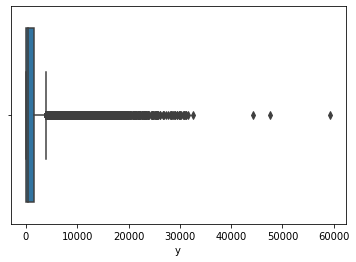

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df_daily['y'])
plt.show()

## we can make our cap to be 30k and our floor to be 0

In [240]:
df_daily_log = df_monthly.copy()
df_daily_log['cap'] = 30000
df_daily_log['floor'] = 0
m = Prophet(growth = 'logistic')
m.fit(df_daily_log)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [241]:
future_daily100 = m.make_future_dataframe(periods=100, freq = 'D')
future_daily100['cap'] = 30000
future_daily100['floor'] = 0

future_daily200 = m.make_future_dataframe(periods=200, freq = 'D')
future_daily200['cap'] = 30000
future_daily200['floor'] = 0



future_daily365 = m.make_future_dataframe(periods=365, freq = 'D')
future_daily365['cap'] = 30000
future_daily365['floor'] = 0

forecast_daily100 = m.predict(future_daily100)
forecast_daily100_metric = forecast_daily100.merge(df_daily, on = 'ds')
forecast_daily200 = m.predict(future_daily200)
forecast_daily200_metric = forecast_daily200.merge(df_daily, on = 'ds')
forecast_daily365 = m.predict(future_daily365)
forecast_daily365_metric = forecast_daily365.merge(df_daily, on = 'ds')

In [242]:
forecast_daily100[['ds' , 'yhat']].tail(20)

ds          yhat
190 2021-04-23  33171.886118
191 2021-04-24  33033.675202
192 2021-04-25  32643.500888
193 2021-04-26  31985.455566
194 2021-04-27  31050.760951
195 2021-04-28  29838.288747
196 2021-04-29  28354.845382
197 2021-04-30  26615.212817
198 2021-05-01  24641.945004
199 2021-05-02  22464.927099
200 2021-05-03  20120.711711
201 2021-05-04  17651.653156
202 2021-05-05  15104.866599
203 2021-05-06  12531.044036
204 2021-05-07   9983.163032
205 2021-05-08   7515.127018
206 2021-05-09   5180.377573
207 2021-05-10   3030.519499
208 2021-05-11   1113.998627
209 2021-05-12   -525.129732

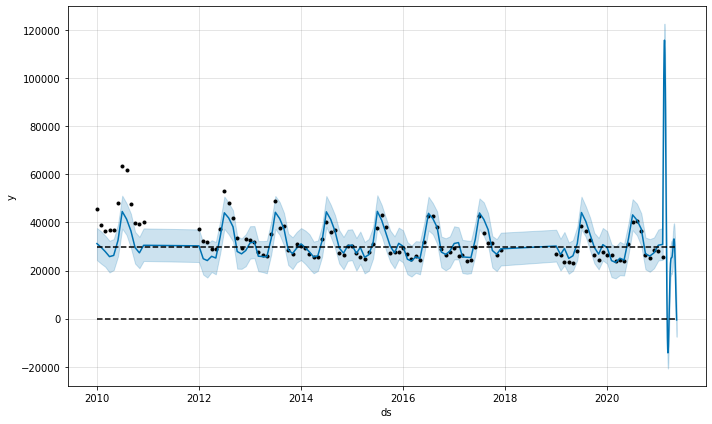

In [243]:
fig1 = m.plot(forecast_daily100)

In [244]:
print('r2 score:',r2_score(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))

r2 score: -30.070942381878833
mean absolute percentage error: 2.8818884221690884e+19
mean_absolute_error: 26508.364483043766


In [245]:
forecast_daily200[['ds' , 'yhat']].tail(20)

ds          yhat
290 2021-08-01  40463.851912
291 2021-08-02  41387.937340
292 2021-08-03  42113.985750
293 2021-08-04  42612.368771
294 2021-08-05  42859.106730
295 2021-08-06  42836.811050
296 2021-08-07  42535.468411
297 2021-08-08  41953.037649
298 2021-08-09  41095.835199
299 2021-08-10  39978.690587
300 2021-08-11  38624.859888
301 2021-08-12  37065.691994
302 2021-08-13  35340.049747
303 2021-08-14  33493.495371
304 2021-08-15  31577.256845
305 2021-08-16  29646.998743
306 2021-08-17  27761.427404
307 2021-08-18  25980.765902
308 2021-08-19  24365.138884
309 2021-08-20  22972.910973

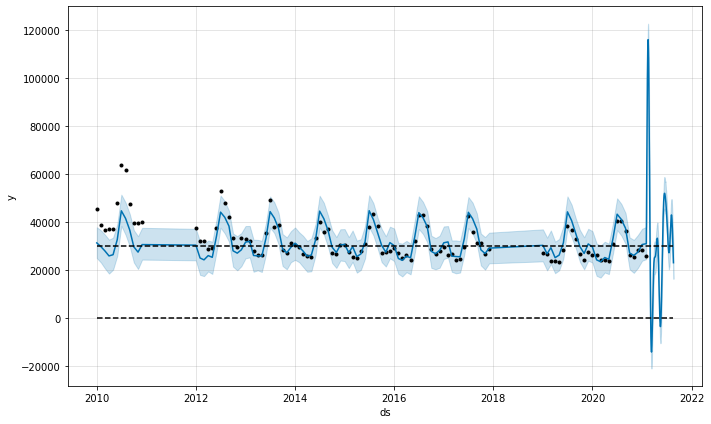

In [246]:
fig1 = m.plot(forecast_daily200)

In [247]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))

r2 score: -30.070942381878833
mean absolute percentage error: 2.8818884221690884e+19
mean_absolute_error: 26508.364483043766


In [248]:
forecast_daily365[['ds' , 'yhat']].tail(20)

ds          yhat
455 2022-01-13  -1804.311303
456 2022-01-14  -6948.768914
457 2022-01-15 -11890.633115
458 2022-01-16 -16479.229849
459 2022-01-17 -20568.597826
460 2022-01-18 -24021.203599
461 2022-01-19 -26711.484954
462 2022-01-20 -28529.131687
463 2022-01-21 -29382.019164
464 2022-01-22 -29198.718718
465 2022-01-23 -27930.519497
466 2022-01-24 -25552.908729
467 2022-01-25 -22066.471083
468 2022-01-26 -17497.182565
469 2022-01-27 -11896.089801
470 2022-01-28  -5338.381179
471 2022-01-29   2078.128203
472 2022-01-30  10235.060957
473 2022-01-31  18996.040477
474 2022-02-01  28209.689363

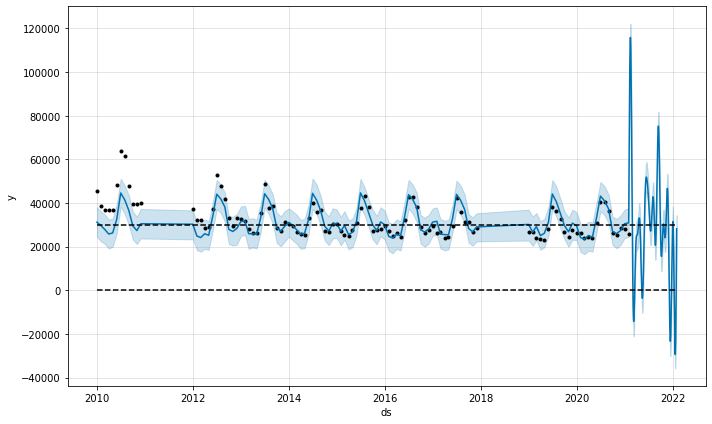

In [249]:
fig1 = m.plot(forecast_daily365)

In [250]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily365_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))

r2 score: -30.070942381878833
mean absolute percentage error: 2.8818884221690884e+19
mean_absolute_error: 26508.364483043766


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



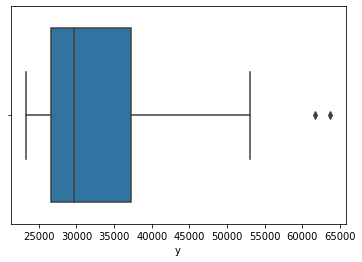

In [251]:
sns.boxplot(df_monthly['y'])
plt.show()

## we can make our cap to be 55k and our floor to be 20k

In [252]:
df_monthly_log = df_monthly.copy()
df_monthly_log['cap'] = 55000
df_monthly_log['floor'] = 20000
m = Prophet(growth = 'logistic')
m.fit(df_monthly_log)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [253]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly1['cap'] = 55000
future_monthly1['floor'] = 20000

future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly6['cap'] = 55000
future_monthly6['floor'] = 20000

future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')
future_monthly9['cap'] = 55000
future_monthly9['floor'] = 20000

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [254]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds          yhat
106 2020-11-01  21094.894304
107 2020-12-01  23706.806582
108 2021-01-01  24887.365185
109 2021-02-01  23016.909194
110 2021-02-28  20995.859576

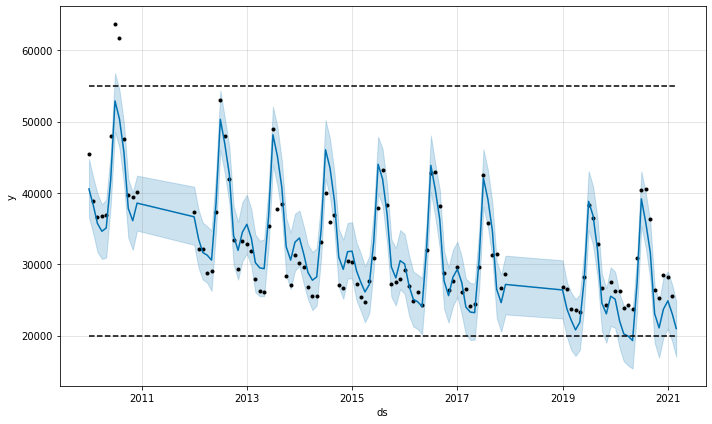

In [255]:
fig1 = m.plot(forecast_monthly1)

In [256]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: 0.8472378887794625
mean absolute percentage error: 0.07279311038460964
mean_absolute_error: 2357.096878656791


In [257]:
forecast_monthly6[['ds' , 'yhat']].tail(7)

ds          yhat
109 2021-02-01  23016.909194
110 2021-02-28  20995.859576
111 2021-03-31  18866.110505
112 2021-04-30  21045.336441
113 2021-05-31  25917.561080
114 2021-06-30  36072.212816
115 2021-07-31  35024.200054

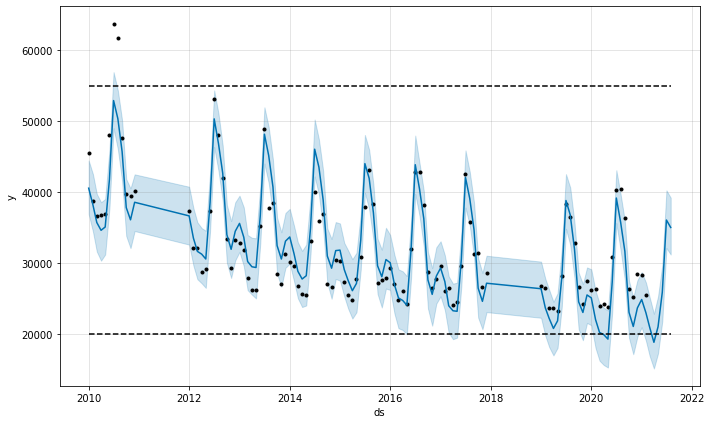

In [258]:
fig1 = m.plot(forecast_monthly6)

In [259]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: 0.8472378887794625
mean absolute percentage error: 0.07279311038460964
mean_absolute_error: 2357.096878656791


In [260]:
forecast_monthly9[['ds' , 'yhat']].tail(10)

ds          yhat
109 2021-02-01  23016.909194
110 2021-02-28  20995.859576
111 2021-03-31  18866.110505
112 2021-04-30  21045.336441
113 2021-05-31  25917.561080
114 2021-06-30  36072.212816
115 2021-07-31  35024.200054
116 2021-08-31  29778.606272
117 2021-09-30  23206.595765
118 2021-10-31  22015.120809

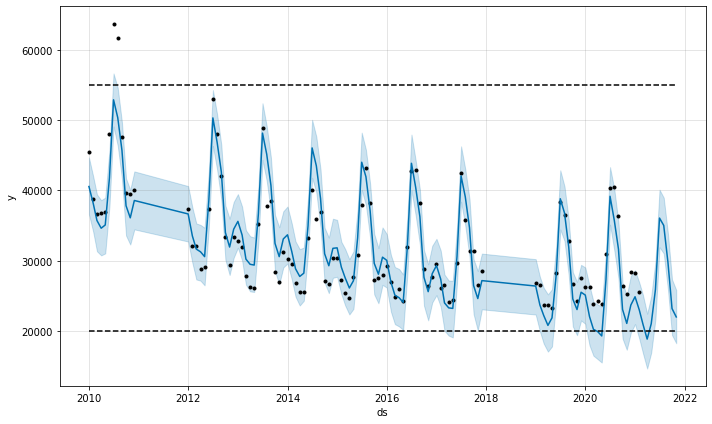

In [261]:
fig1 = m.plot(forecast_monthly9)

In [262]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: 0.8472378887794625
mean absolute percentage error: 0.07279311038460964
mean_absolute_error: 2357.096878656791


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



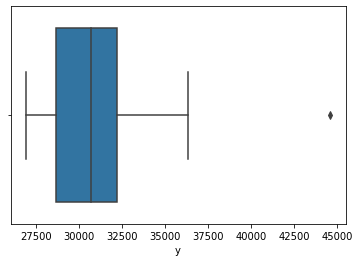

In [263]:
sns.boxplot(df_yearly['y'])
plt.show()
## our cap would be about 36k and our floor would be 26.5k

In [264]:
df_yearly_log = df_yearly.copy()
df_yearly_log['cap'] = 36000
df_yearly_log['floor'] = 26500
m = Prophet(growth = 'logistic')
m.fit(df_yearly_log)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


In [265]:
future_yearly1 = m.make_future_dataframe(periods=1, freq = 'Y')
future_yearly1['cap'] = 36000
future_yearly1['floor'] = 26500

future_yearly10 = m.make_future_dataframe(periods=10, freq = 'Y')
future_yearly10['cap'] = 36000
future_yearly10['floor'] = 26500

future_yearly20 = m.make_future_dataframe(periods=20, freq = 'Y')
future_yearly20['cap'] = 36000
future_yearly20['floor'] = 26500

forecast_yearly1 = m.predict(future_yearly1)
forecast_yearly1_metric = forecast_yearly1.merge(df_yearly, on = 'ds')
forecast_yearly10 = m.predict(future_yearly10)
forecast_yearly10_metric = forecast_yearly10.merge(df_yearly, on = 'ds')
forecast_yearly20 = m.predict(future_yearly20)
forecast_yearly20_metric = forecast_yearly20.merge(df_yearly, on = 'ds')


In [266]:
forecast_yearly1[['ds' , 'yhat']].tail()

ds          yhat
6  2017-01-01  29440.739735
7  2019-01-01  29543.157560
8  2020-01-01  29601.450429
9  2021-01-01  29027.329978
10 2021-12-31  29569.451483

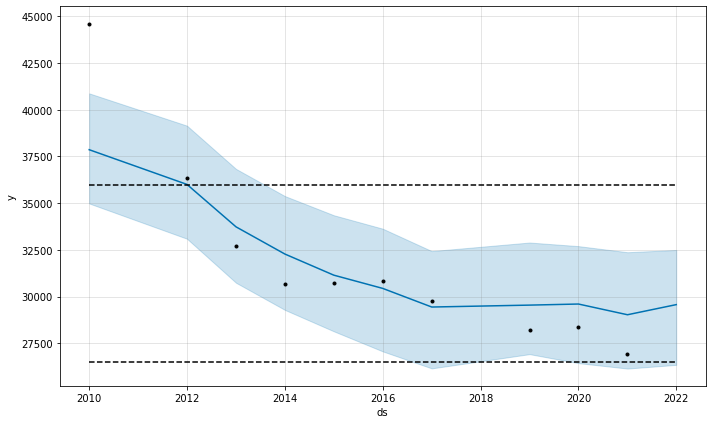

In [267]:
fig1 = m.plot(forecast_yearly1)

In [268]:
print('r2 score:',r2_score(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))

r2 score: 0.7622333325645682
mean absolute percentage error: 0.04508960371282369
mean_absolute_error: 1553.8092610839856


In [269]:
forecast_yearly10[['ds' , 'yhat']].tail(11)

ds          yhat
9  2021-01-01  29027.329978
10 2021-12-31  29569.451483
11 2022-12-31  29457.907529
12 2023-12-31  29277.419483
13 2024-12-31  29593.993565
14 2025-12-31  29559.556680
15 2026-12-31  29453.259179
16 2027-12-31  29275.236501
17 2028-12-31  29592.970658
18 2029-12-31  29559.076404
19 2030-12-31  29453.033688

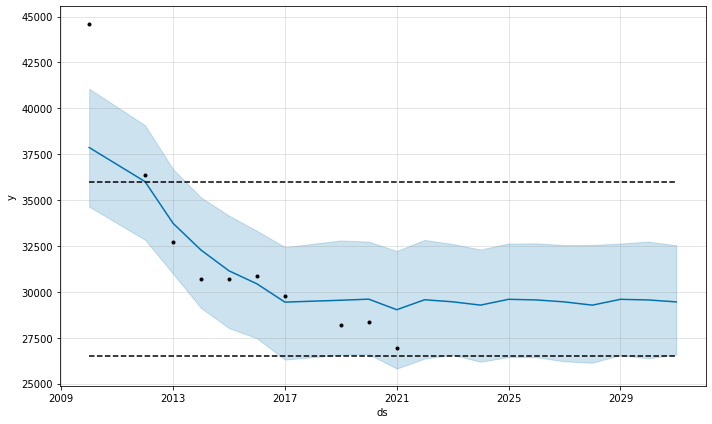

In [270]:
fig1 = m.plot(forecast_yearly10)

In [271]:
print('r2 score:',r2_score(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))

r2 score: 0.7622333325645682
mean absolute percentage error: 0.04508960371282369
mean_absolute_error: 1553.8092610839856


In [272]:
forecast_yearly20[['ds' , 'yhat']].tail()

ds          yhat
25 2036-12-31  29592.918652
26 2037-12-31  29559.051988
27 2038-12-31  29453.022224
28 2039-12-31  29275.125251
29 2040-12-31  29592.918535

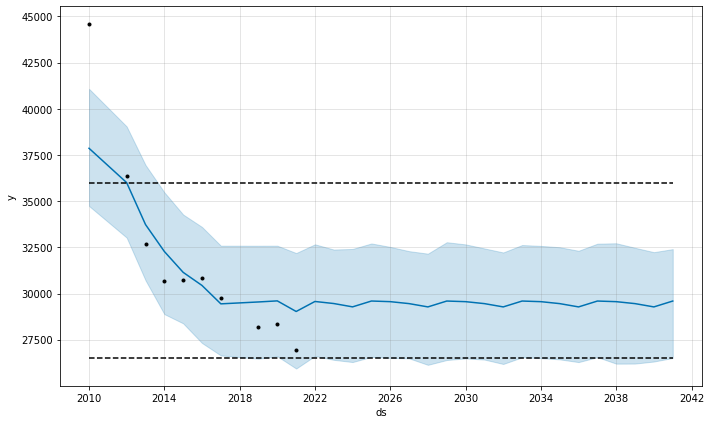

In [273]:
fig1 = m.plot(forecast_yearly20)

In [274]:
print('r2 score:',r2_score(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))

r2 score: 0.7622333325645682
mean absolute percentage error: 0.04508960371282369
mean_absolute_error: 1553.8092610839856


Modeling with Parameters - Seasonality

In [275]:
m = Prophet()
m.add_seasonality(name='daily', period=30.5, fourier_order=5)
m.fit(df_daily)

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [276]:
future_daily100 = m.make_future_dataframe(periods=100, freq = 'D')
future_daily200 = m.make_future_dataframe(periods=200, freq = 'D')
future_daily365 = m.make_future_dataframe(periods=365, freq = 'D')

forecast_daily100 = m.predict(future_daily100)
forecast_daily100_metric = forecast_daily100.merge(df_daily, on = 'ds')
forecast_daily200 = m.predict(future_daily200)
forecast_daily200_metric = forecast_daily200.merge(df_daily, on = 'ds')
forecast_daily365 = m.predict(future_daily365)
forecast_daily365_metric = forecast_daily365.merge(df_daily, on = 'ds')

In [277]:
forecast_daily100[['ds' , 'yhat']].tail(20)

ds         yhat
668 2021-04-18  7051.840669
669 2021-04-19  1924.405217
670 2021-04-20   664.690517
671 2021-04-21   296.637372
672 2021-04-22   386.841857
673 2021-04-23   743.578548
674 2021-04-24  2835.661372
675 2021-04-25  3975.006077
676 2021-04-26  1223.652353
677 2021-04-27  1568.940480
678 2021-04-28  1994.224584
679 2021-04-29  2384.407351
680 2021-04-30  2870.136770
681 2021-05-01  5031.759342
682 2021-05-02  6140.080699
683 2021-05-03  3261.864792
684 2021-05-04  3525.380127
685 2021-05-05  4059.274608
686 2021-05-06  4676.670688
687 2021-05-07  5158.158642

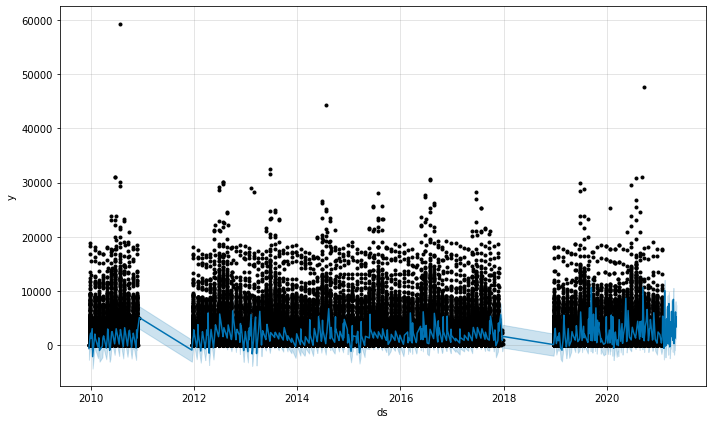

In [278]:
fig1 = m.plot(forecast_daily100)

In [279]:
print('r2 score:',r2_score(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))

r2 score: 0.027802791790751513
mean absolute percentage error: 1.493756483237006e+18
mean_absolute_error: 1049.8766934488267


In [280]:
forecast_daily200[['ds' , 'yhat']].tail(20)

ds          yhat
768 2021-07-27   2044.779158
769 2021-07-28   2433.301583
770 2021-07-29   2757.048806
771 2021-07-30   3170.327875
772 2021-07-31   5297.186046
773 2021-08-01   6417.901773
774 2021-08-02   3545.666334
775 2021-08-03   3738.794524
776 2021-08-04   4130.938653
777 2021-08-05   4654.467223
778 2021-08-06   5242.871272
779 2021-08-07   7098.236848
780 2021-08-08   7198.536414
781 2021-08-09   2692.567093
782 2021-08-10   1255.117741
783 2021-08-11    818.700198
784 2021-08-12   1853.185762
785 2021-08-13   4272.226540
786 2021-08-14   8713.129713
787 2021-08-15  11300.621558

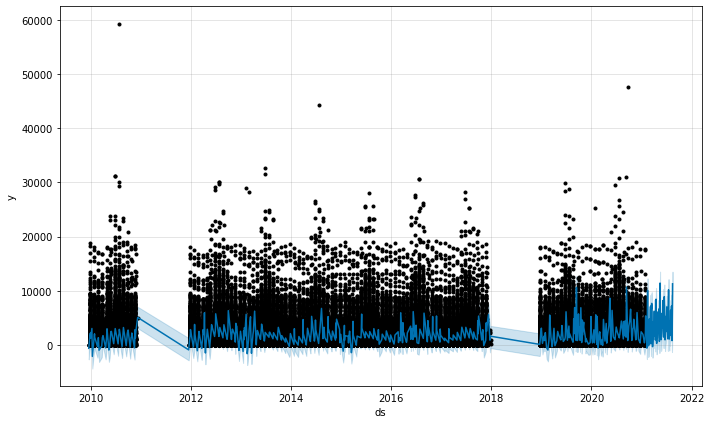

In [281]:
fig1 = m.plot(forecast_daily200)

In [282]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))

r2 score: 0.027802791790751513
mean absolute percentage error: 1.493756483237006e+18
mean_absolute_error: 1049.8766934488267


In [283]:
forecast_daily365[['ds' , 'yhat']].tail(20)

ds          yhat
933 2022-01-08   5421.476059
934 2022-01-09   4625.093046
935 2022-01-10    367.528449
936 2022-01-11    537.962579
937 2022-01-12   2361.378537
938 2022-01-13   5033.898309
939 2022-01-14   7446.828416
940 2022-01-15  10152.441545
941 2022-01-16  10172.473535
942 2022-01-17   5093.408555
943 2022-01-18   2859.831031
944 2022-01-19   1237.380208
945 2022-01-20    368.263748
946 2022-01-21    216.477492
947 2022-01-22   2105.282779
948 2022-01-23   3164.027722
949 2022-01-24    377.401541
950 2022-01-25    717.690356
951 2022-01-26   1127.875049
952 2022-01-27   1436.822894

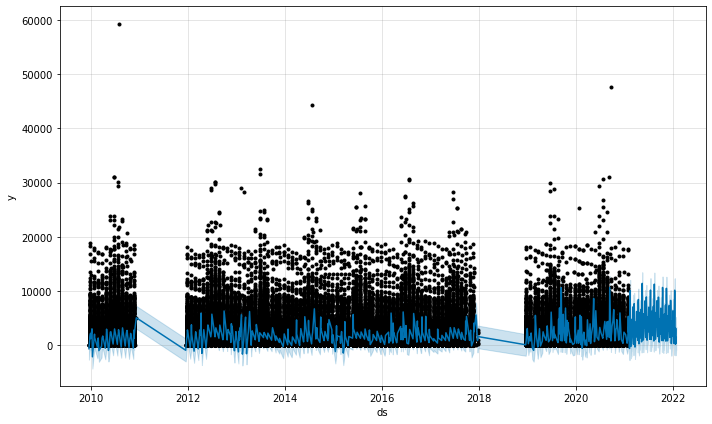

In [284]:
fig1 = m.plot(forecast_daily365)

In [285]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily365_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))

r2 score: 0.027802791790751513
mean absolute percentage error: 1.493756483237006e+18
mean_absolute_error: 1049.8766934488267


In [286]:
m = Prophet()
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df_monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [287]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [288]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds          yhat
106 2020-11-01  24253.622510
107 2020-12-01  27661.827618
108 2021-01-01  28106.691950
109 2021-02-01  25725.791644
110 2021-02-28  11339.767176

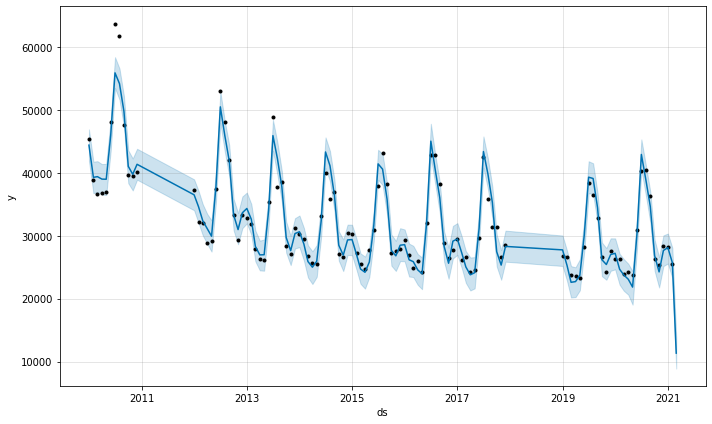

In [289]:
fig1 = m.plot(forecast_monthly1)

In [290]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: 0.9392813616264979
mean absolute percentage error: 0.04080948395076416
mean_absolute_error: 1407.671717934799


In [291]:
forecast_monthly6[['ds' , 'yhat']].tail(7)

ds          yhat
109 2021-02-01  25725.791644
110 2021-02-28  11339.767176
111 2021-03-31  14248.172155
112 2021-04-30  14416.637487
113 2021-05-31  21555.818557
114 2021-06-30  26359.708133
115 2021-07-31  31001.714455

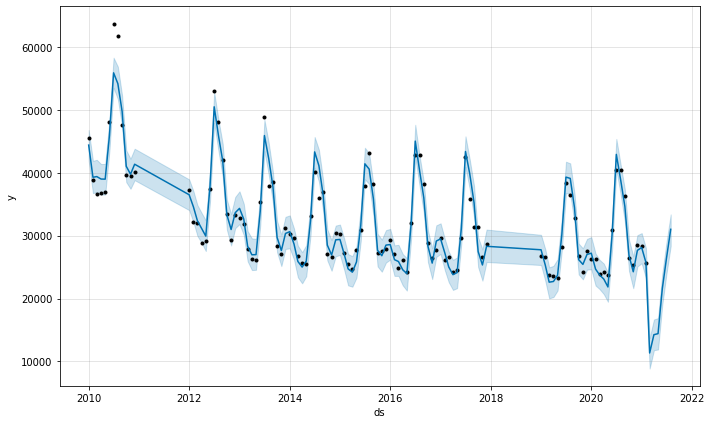

In [292]:
fig1 = m.plot(forecast_monthly6)

In [293]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: 0.9392813616264979
mean absolute percentage error: 0.04080948395076416
mean_absolute_error: 1407.671717934799


In [294]:
forecast_monthly9[['ds' , 'yhat']].tail(10)

ds          yhat
109 2021-02-01  25725.791644
110 2021-02-28  11339.767176
111 2021-03-31  14248.172155
112 2021-04-30  14416.637487
113 2021-05-31  21555.818557
114 2021-06-30  26359.708133
115 2021-07-31  31001.714455
116 2021-08-31  28672.837751
117 2021-09-30  17509.418432
118 2021-10-31  20560.268293

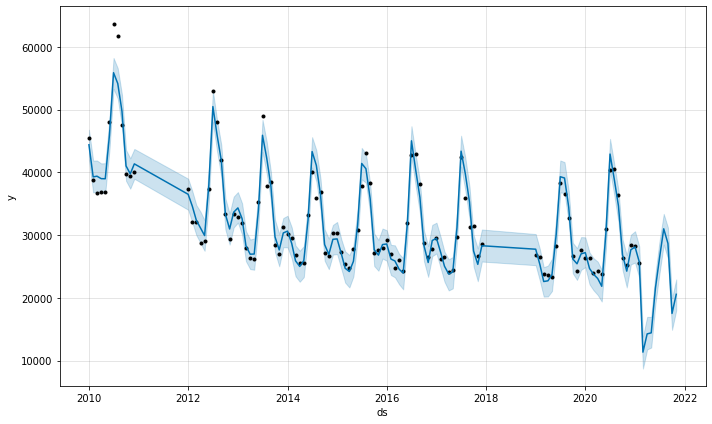

In [295]:
fig1 = m.plot(forecast_monthly9)

In [296]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: 0.9392813616264979
mean absolute percentage error: 0.04080948395076416
mean_absolute_error: 1407.671717934799


In [297]:
m = Prophet()
m.add_seasonality(name='yearly', period=365, fourier_order=5)
m.fit(df_yearly)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


In [298]:
future_yearly1 = m.make_future_dataframe(periods=1, freq = 'Y')
future_yearly10 = m.make_future_dataframe(periods=10, freq = 'Y')
future_yearly20 = m.make_future_dataframe(periods=20, freq = 'Y')

forecast_yearly1 = m.predict(future_yearly1)
forecast_yearly1_metric = forecast_yearly1.merge(df_yearly, on = 'ds')
forecast_yearly10 = m.predict(future_yearly10)
forecast_yearly10_metric = forecast_yearly10.merge(df_yearly, on = 'ds')
forecast_yearly20 = m.predict(future_yearly20)
forecast_yearly20_metric = forecast_yearly20.merge(df_yearly, on = 'ds')

In [299]:
forecast_yearly1[['ds' , 'yhat']].tail()

ds          yhat
6  2017-01-01  29238.398379
7  2019-01-01  27361.321261
8  2020-01-01  26422.782598
9  2021-01-01  27515.276810
10 2021-12-31  24545.705272

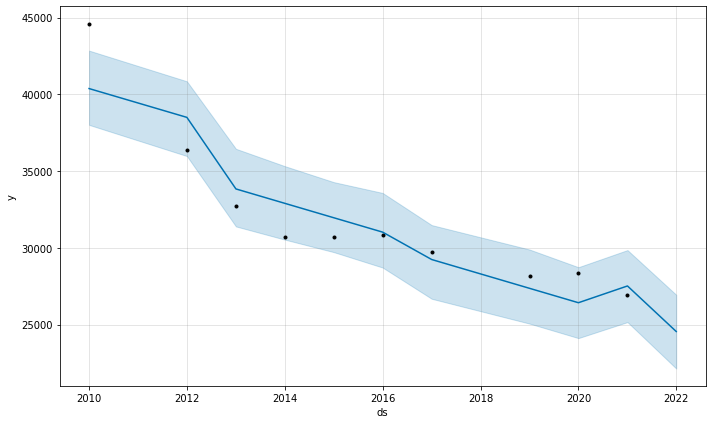

In [300]:
fig1 = m.plot(forecast_yearly1)

In [301]:
print('r2 score:',r2_score(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))

r2 score: 0.8539576392659869
mean absolute percentage error: 0.044303235350310596
mean_absolute_error: 1499.4735830681682


In [302]:
forecast_yearly10[['ds' , 'yhat']].tail(11)

ds          yhat
9  2021-01-01  27515.276810
10 2021-12-31  24545.705272
11 2022-12-31  23607.166608
12 2023-12-31  22668.627945
13 2024-12-31  23761.122158
14 2025-12-31  22822.583495
15 2026-12-31  21884.044832
16 2027-12-31  20945.506169
17 2028-12-31  24891.685013
18 2029-12-31  23953.146350
19 2030-12-31  23014.607687

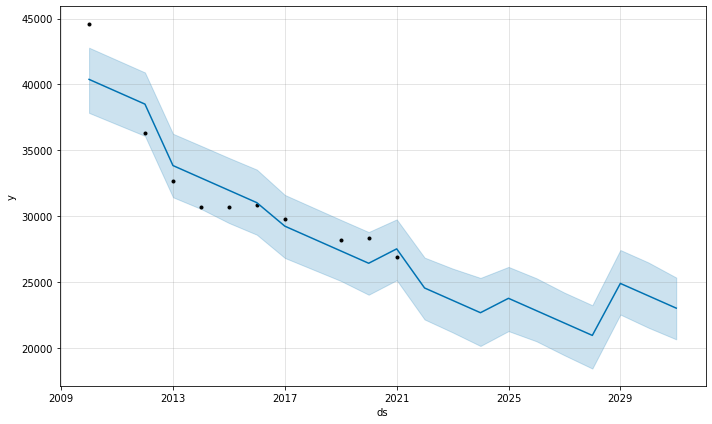

In [303]:
fig1 = m.plot(forecast_yearly10)

In [304]:
print('r2 score:',r2_score(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))

r2 score: 0.8539576392659861
mean absolute percentage error: 0.044303235350311054
mean_absolute_error: 1499.4735830681807


In [305]:
forecast_yearly20[['ds' , 'yhat']].tail(21)

ds          yhat
9  2021-01-01  27515.276810
10 2021-12-31  24545.705272
11 2022-12-31  23607.166608
12 2023-12-31  22668.627945
13 2024-12-31  23761.122158
14 2025-12-31  22822.583495
15 2026-12-31  21884.044832
16 2027-12-31  20945.506169
17 2028-12-31  24891.685013
18 2029-12-31  23953.146350
19 2030-12-31  23014.607687
20 2031-12-31  22076.069024
21 2032-12-31  28830.579817
22 2033-12-31  27892.041154
23 2034-12-31  26953.502491
24 2035-12-31  26014.963828
25 2036-12-31  35511.039487
26 2037-12-31  34572.500824
27 2038-12-31  33633.962161
28 2039-12-31  32695.423498
29 2040-12-31  44845.379780

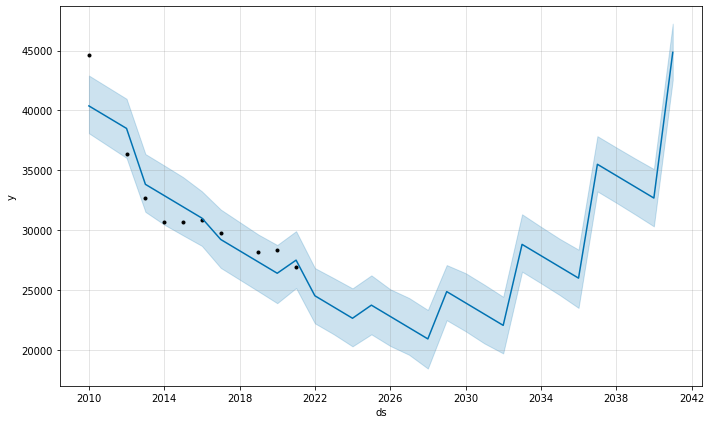

In [306]:
fig1 = m.plot(forecast_yearly20)

In [307]:
print('r2 score:',r2_score(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))

r2 score: 0.8539576392659861
mean absolute percentage error: 0.044303235350311054
mean_absolute_error: 1499.4735830681807


Modeling W/ Parameters - Trend Changepoints

In [308]:
from prophet.plot import add_changepoints_to_plot

In [309]:
m = Prophet(changepoint_prior_scale=0.8)
m.fit(df_daily)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [310]:
future_daily100 = m.make_future_dataframe(periods=100, freq = 'D')
future_daily200 = m.make_future_dataframe(periods=200, freq = 'D')
future_daily365 = m.make_future_dataframe(periods=365, freq = 'D')

forecast_daily100 = m.predict(future_daily100)
forecast_daily100_metric = forecast_daily100.merge(df_daily, on = 'ds')
forecast_daily200 = m.predict(future_daily200)
forecast_daily200_metric = forecast_daily200.merge(df_daily, on = 'ds')
forecast_daily365 = m.predict(future_daily365)
forecast_daily365_metric = forecast_daily365.merge(df_daily, on = 'ds')

In [311]:
forecast_daily100[['ds' , 'yhat']].tail(20)

ds         yhat
668 2021-04-18  4649.880234
669 2021-04-19   808.298790
670 2021-04-20   795.844027
671 2021-04-21   821.616305
672 2021-04-22   826.929578
673 2021-04-23   849.564766
674 2021-04-24  3769.064785
675 2021-04-25  4736.394667
676 2021-04-26   871.855736
677 2021-04-27   833.648147
678 2021-04-28   831.607100
679 2021-04-29   807.863384
680 2021-04-30   801.076446
681 2021-05-01  3691.707143
682 2021-05-02  4631.654178
683 2021-05-03   742.143788
684 2021-05-04   682.267596
685 2021-05-05   662.694605
686 2021-05-06   626.308598
687 2021-05-07   612.419746

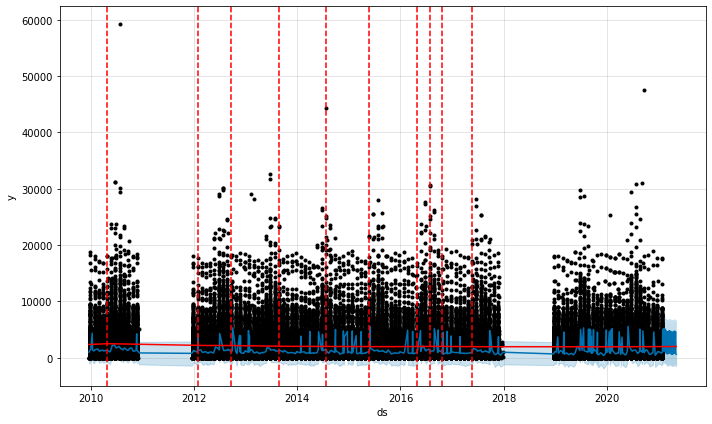

In [314]:
fig1 = m.plot(forecast_daily100)
a = add_changepoints_to_plot(fig1.gca(), m, forecast_daily100)

In [315]:
print('r2 score:',r2_score(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))

r2 score: 0.023343359403257158
mean absolute percentage error: 1.499081309510284e+18
mean_absolute_error: 1049.2322671175075


In [316]:
forecast_daily200[['ds' , 'yhat']].tail(20)

ds         yhat
768 2021-07-27  1221.731257
769 2021-07-28  1179.464135
770 2021-07-29  1119.295878
771 2021-07-30  1080.563939
772 2021-07-31  3944.259808
773 2021-08-01  4862.650210
774 2021-08-02   957.156075
775 2021-08-03   886.884442
776 2021-08-04   862.339434
777 2021-08-05   826.063571
778 2021-08-06   816.858134
779 2021-08-07  3715.050050
780 2021-08-08  4672.129470
781 2021-08-09   808.647593
782 2021-08-10   782.769455
783 2021-08-11   804.007304
784 2021-08-12   813.885308
785 2021-08-13   850.183732
786 2021-08-14  3792.229535
787 2021-08-15  4790.556982

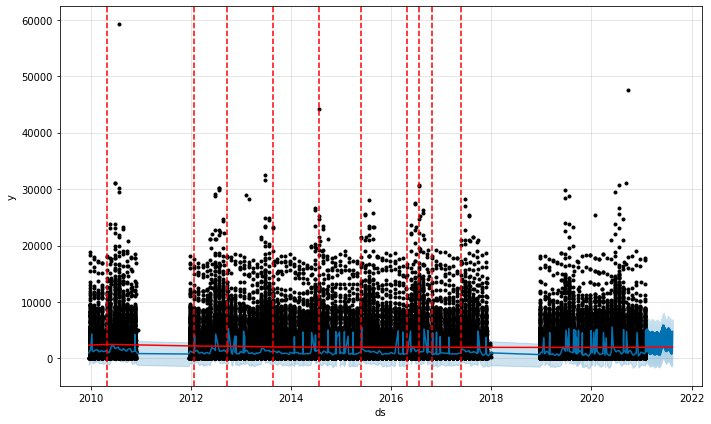

In [317]:
fig1 = m.plot(forecast_daily200)
a = add_changepoints_to_plot(fig1.gca(), m, forecast_daily200)

In [318]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))

r2 score: 0.023343359403257158
mean absolute percentage error: 1.499081309510284e+18
mean_absolute_error: 1049.2322671175075


In [319]:
forecast_daily365[['ds' , 'yhat']].tail(20)

ds         yhat
933 2022-01-08  4017.518371
934 2022-01-09  4955.658551
935 2022-01-10  1064.727724
936 2022-01-11  1003.872690
937 2022-01-12   983.749633
938 2022-01-13   947.160422
939 2022-01-14   933.265319
940 2022-01-15  3822.839830
941 2022-01-16  4767.900100
942 2022-01-17   889.586786
943 2022-01-18   846.702457
944 2022-01-19   849.428573
945 2022-01-20   839.973203
946 2022-01-21   856.798069
947 2022-01-22  3779.892275
948 2022-01-23  4760.416759
949 2022-01-24   918.608891
950 2022-01-25   912.341807
951 2022-01-26   950.863971
952 2022-01-27   975.469579

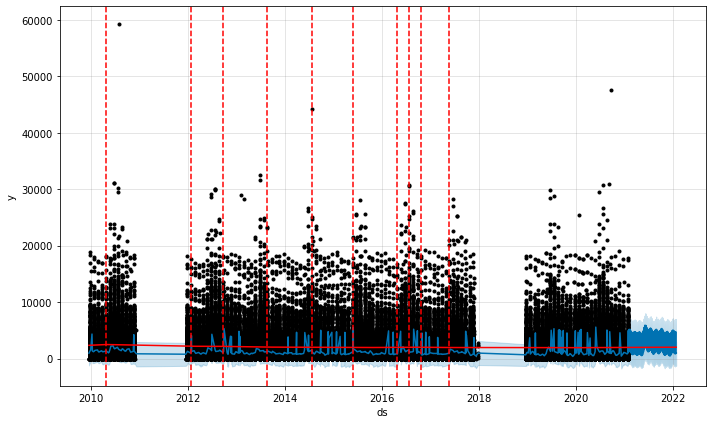

In [320]:
fig1 = m.plot(forecast_daily365)
a = add_changepoints_to_plot(fig1.gca(), m, forecast_daily365)

In [321]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily365_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))

r2 score: 0.023343359403257158
mean absolute percentage error: 1.499081309510284e+18
mean_absolute_error: 1049.2322671175075


In [322]:
m = Prophet(changepoint_prior_scale=0.003)
m.fit(df_daily)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [323]:
future_daily100 = m.make_future_dataframe(periods=100, freq = 'D')
future_daily200 = m.make_future_dataframe(periods=200, freq = 'D')
future_daily365 = m.make_future_dataframe(periods=365, freq = 'D')

forecast_daily100 = m.predict(future_daily100)
forecast_daily100_metric = forecast_daily100.merge(df_daily, on = 'ds')
forecast_daily200 = m.predict(future_daily200)
forecast_daily200_metric = forecast_daily200.merge(df_daily, on = 'ds')
forecast_daily365 = m.predict(future_daily365)
forecast_daily365_metric = forecast_daily365.merge(df_daily, on = 'ds')

In [324]:
forecast_daily100[['ds' , 'yhat']].tail(20)

ds         yhat
668 2021-04-18  4619.886927
669 2021-04-19   775.551443
670 2021-04-20   763.045256
671 2021-04-21   794.825301
672 2021-04-22   798.455231
673 2021-04-23   833.914093
674 2021-04-24  3767.656840
675 2021-04-25  4737.498939
676 2021-04-26   868.400783
677 2021-04-27   827.870201
678 2021-04-28   829.158705
679 2021-04-29   800.713874
680 2021-04-30   803.466319
681 2021-05-01  3704.866426
682 2021-05-02  4643.743679
683 2021-05-03   746.064934
684 2021-05-04   680.310590
685 2021-05-05   660.644950
686 2021-05-06   616.343861
687 2021-05-07   609.058693

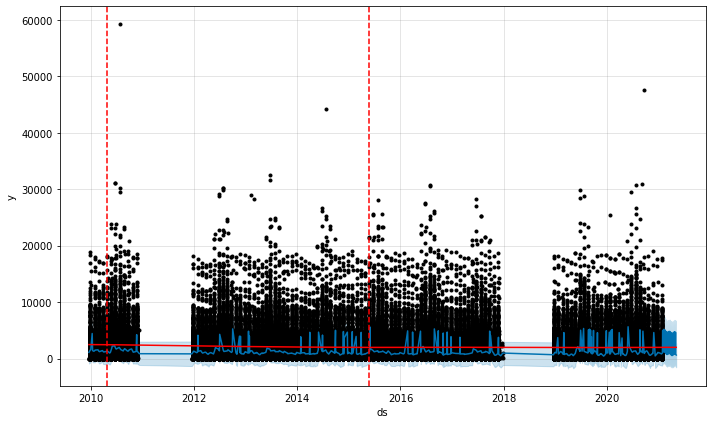

In [325]:
fig1 = m.plot(forecast_daily100)
a = add_changepoints_to_plot(fig1.gca(), m, forecast_daily100)

In [326]:
print('r2 score:',r2_score(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily100_metric.y, forecast_daily100_metric.yhat))

r2 score: 0.023225224116506515
mean absolute percentage error: 1.499073411247095e+18
mean_absolute_error: 1049.2968769845875


In [327]:
forecast_daily200[['ds' , 'yhat']].tail(20)

ds         yhat
768 2021-07-27  1204.986910
769 2021-07-28  1162.675665
770 2021-07-29  1094.484539
771 2021-07-30  1062.073036
772 2021-07-31  3933.472519
773 2021-08-01  4847.929455
774 2021-08-02   931.652117
775 2021-08-03   853.179988
776 2021-08-04   826.552331
777 2021-08-05   780.739013
778 2021-08-06   776.912587
779 2021-08-07  3682.477177
780 2021-08-08  4635.927189
781 2021-08-09   762.612232
782 2021-08-10   730.127033
783 2021-08-11   751.502319
784 2021-08-12   754.659230
785 2021-08-13   799.705709
786 2021-08-14  3752.989845
787 2021-08-15  4751.982640

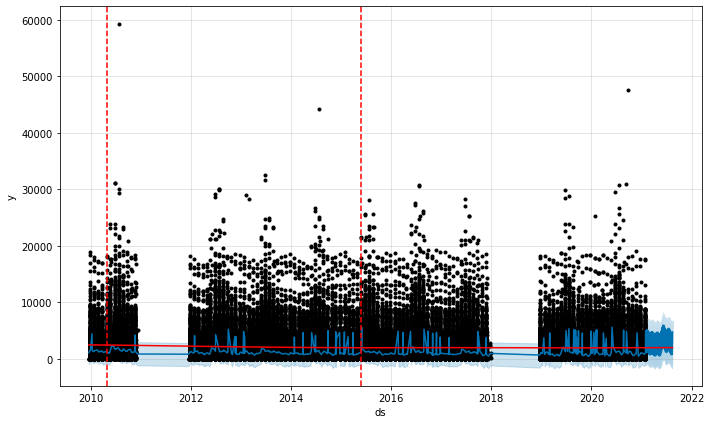

In [328]:
fig1 = m.plot(forecast_daily200)
a = add_changepoints_to_plot(fig1.gca(), m, forecast_daily200)

In [329]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily200_metric.y, forecast_daily200_metric.yhat))

r2 score: 0.023225224116506515
mean absolute percentage error: 1.499073411247095e+18
mean_absolute_error: 1049.2968769845875


In [330]:
forecast_daily365[['ds' , 'yhat']].tail(20)

ds         yhat
933 2022-01-08  3986.104568
934 2022-01-09  4924.411604
935 2022-01-10  1027.134123
936 2022-01-11   962.729351
937 2022-01-12   945.259832
938 2022-01-13   903.821748
939 2022-01-14   899.811985
940 2022-01-15  3800.949657
941 2022-01-16  4746.125365
942 2022-01-17   861.154822
943 2022-01-18   814.155974
944 2022-01-19   818.725933
945 2022-01-20   803.380669
946 2022-01-21   828.836289
947 2022-01-22  3762.047283
948 2022-01-23  4741.074588
949 2022-01-24   890.859654
950 2022-01-25   878.623132
951 2022-01-26   917.063972
952 2022-01-27   933.821325

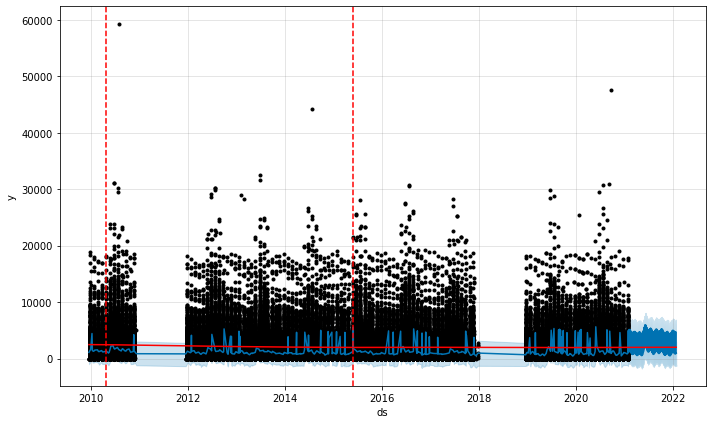

In [331]:
fig1 = m.plot(forecast_daily365)
a = add_changepoints_to_plot(fig1.gca(), m, forecast_daily365)

In [332]:
print('r2 score:',r2_score(forecast_daily200_metric.y, forecast_daily365_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_daily365_metric.y, forecast_daily365_metric.yhat))

r2 score: 0.023225224116506515
mean absolute percentage error: 1.499073411247095e+18
mean_absolute_error: 1049.2968769845875


In [333]:
m = Prophet(changepoint_prior_scale=0.8)
m.fit(df_monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [334]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [335]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds          yhat
106 2020-11-01  24573.440432
107 2020-12-01  27955.636241
108 2021-01-01  28920.649356
109 2021-02-01  26554.939035
110 2021-02-28  24049.324117

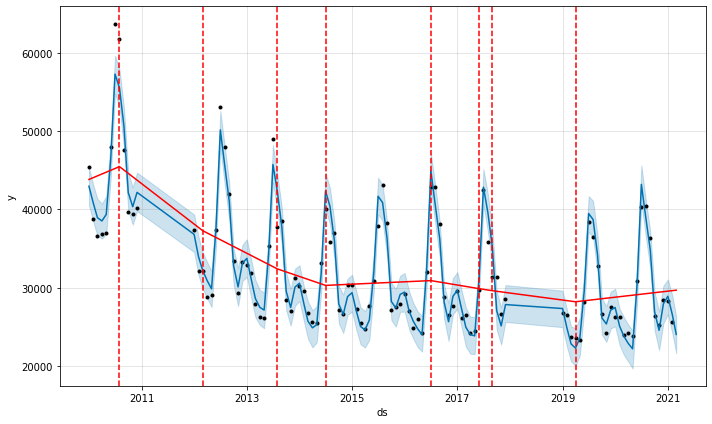

In [336]:
fig = m.plot(forecast_monthly1)
a = add_changepoints_to_plot(fig.gca(), m, forecast_monthly1)

In [337]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: 0.9447858369190093
mean absolute percentage error: 0.040638254695291906
mean_absolute_error: 1403.3152736383004


In [338]:
forecast_monthly6[['ds' , 'yhat']].tail()

ds          yhat
111 2021-03-31  24028.727217
112 2021-04-30  26573.098756
113 2021-05-31  31210.235615
114 2021-06-30  39037.697836
115 2021-07-31  40693.066030

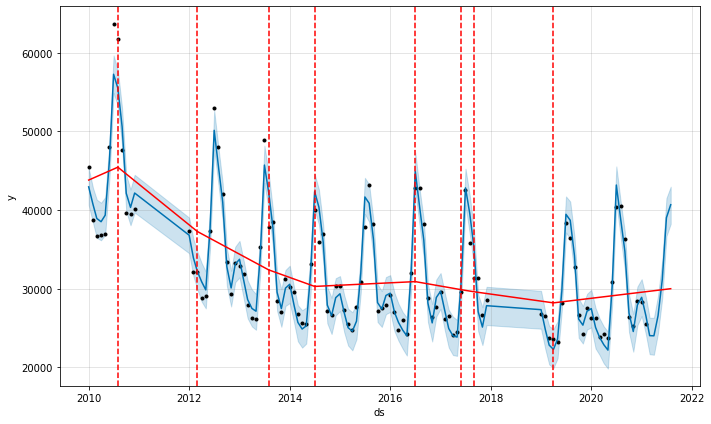

In [339]:
fig = m.plot(forecast_monthly6)
a = add_changepoints_to_plot(fig.gca(), m, forecast_monthly6)

In [340]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: 0.9447858369190093
mean absolute percentage error: 0.0406382546952919
mean_absolute_error: 1403.3152736383001


In [341]:
forecast_monthly9[['ds' , 'yhat']].tail()

ds          yhat
114 2021-06-30  39037.697836
115 2021-07-31  40693.066030
116 2021-08-31  35869.310851
117 2021-09-30  27761.344894
118 2021-10-31  27980.150090

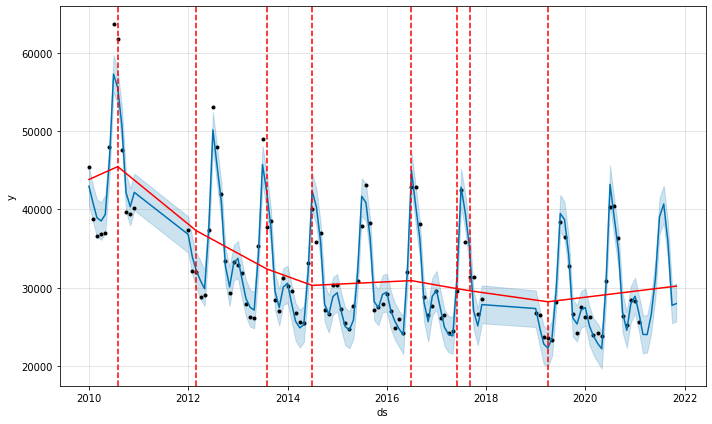

In [342]:
fig = m.plot(forecast_monthly9)
a = add_changepoints_to_plot(fig.gca(), m, forecast_monthly9)


In [343]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: 0.9447858369190093
mean absolute percentage error: 0.0406382546952919
mean_absolute_error: 1403.3152736383001


In [344]:
m = Prophet(changepoint_prior_scale=0.003)
m.fit(df_monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [345]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [346]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds          yhat
106 2020-11-01  20375.667339
107 2020-12-01  21907.225285
108 2021-01-01  21915.378008
109 2021-02-01  19184.621855
110 2021-02-28  16460.338485

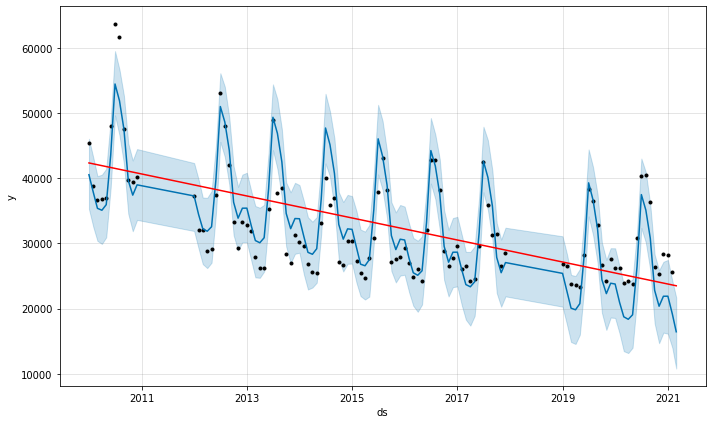

In [347]:
fig = m.plot(forecast_monthly1)
a = add_changepoints_to_plot(fig.gca(), m, forecast_monthly1)

In [348]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: 0.7852786525526076
mean absolute percentage error: 0.09155052767872804
mean_absolute_error: 2860.6552005349085


In [349]:
forecast_monthly6[['ds' , 'yhat']].tail(7)

ds          yhat
109 2021-02-01  19184.621855
110 2021-02-28  16460.338485
111 2021-03-31  16321.470087
112 2021-04-30  17438.719758
113 2021-05-31  25232.174997
114 2021-06-30  35963.061602
115 2021-07-31  33113.197380

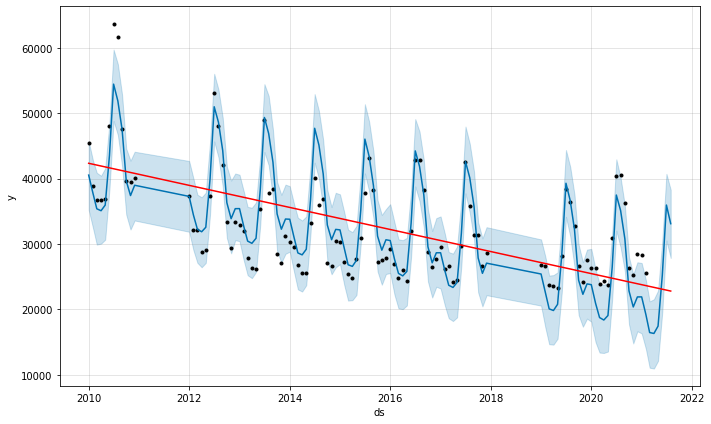

In [350]:
fig = m.plot(forecast_monthly6)
a = add_changepoints_to_plot(fig.gca(), m, forecast_monthly6)

In [351]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: 0.7852786525526076
mean absolute percentage error: 0.09155052767872804
mean_absolute_error: 2860.6552005349085


In [352]:
forecast_monthly9[['ds' , 'yhat']].tail(10)

ds          yhat
109 2021-02-01  19184.621855
110 2021-02-28  16460.338485
111 2021-03-31  16321.470087
112 2021-04-30  17438.719758
113 2021-05-31  25232.174997
114 2021-06-30  35963.061602
115 2021-07-31  33113.197380
116 2021-08-31  28640.611629
117 2021-09-30  21075.050627
118 2021-10-31  19119.227677

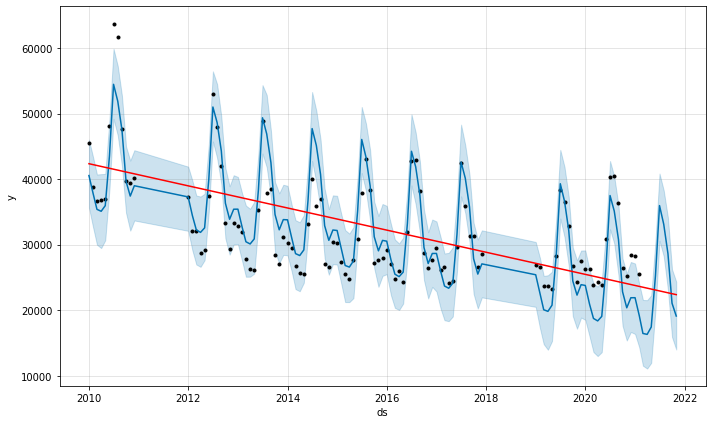

In [353]:
fig = m.plot(forecast_monthly9)
a = add_changepoints_to_plot(fig.gca(), m, forecast_monthly9)

In [354]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: 0.7852786525526076
mean absolute percentage error: 0.09155052767872804
mean_absolute_error: 2860.6552005349085


In [355]:
m = Prophet(changepoint_prior_scale=0.8)
m.fit(df_yearly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


In [356]:
future_yearly1 = m.make_future_dataframe(periods=1, freq = 'Y')
future_yearly10 = m.make_future_dataframe(periods=10, freq = 'Y')
future_yearly20 = m.make_future_dataframe(periods=20, freq = 'Y')

forecast_yearly1 = m.predict(future_yearly1)
forecast_yearly1_metric = forecast_yearly1.merge(df_yearly, on = 'ds')
forecast_yearly10 = m.predict(future_yearly10)
forecast_yearly10_metric = forecast_yearly10.merge(df_yearly, on = 'ds')
forecast_yearly20 = m.predict(future_yearly20)
forecast_yearly20_metric = forecast_yearly20.merge(df_yearly, on = 'ds')

In [357]:
forecast_yearly1[['ds' , 'yhat']].tail()

ds          yhat
6  2017-01-01  29747.362545
7  2019-01-01  28191.254194
8  2020-01-01  28353.656726
9  2021-01-01  26929.525033
10 2021-12-31  28666.385791

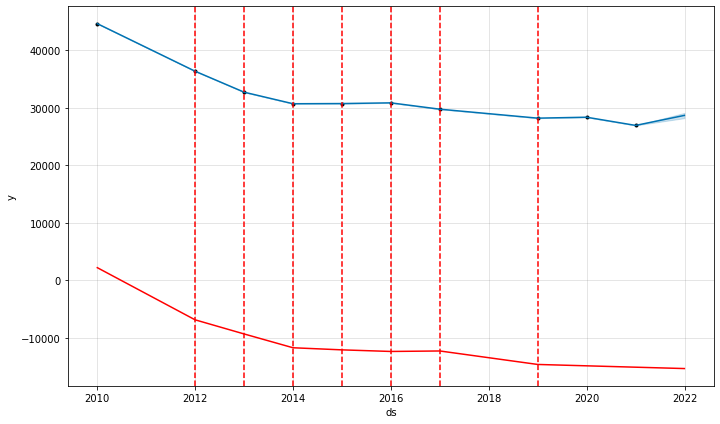

In [358]:
fig = m.plot(forecast_yearly1)
a = add_changepoints_to_plot(fig.gca(), m, forecast_yearly1)

In [359]:
print('r2 score:',r2_score(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))

r2 score: 1.0
mean absolute percentage error: 1.171333946741591e-13
mean_absolute_error: 3.5284756449982523e-09


In [360]:
forecast_yearly10[['ds' , 'yhat']].tail(11)

ds          yhat
9  2021-01-01  26929.525033
10 2021-12-31  28666.385791
11 2022-12-31  28805.626731
12 2023-12-31  28925.836697
13 2024-12-31  27562.374309
14 2025-12-31  27714.901720
15 2026-12-31  27854.142659
16 2027-12-31  27974.352626
17 2028-12-31  26610.890237
18 2029-12-31  26763.417648
19 2030-12-31  26902.658587

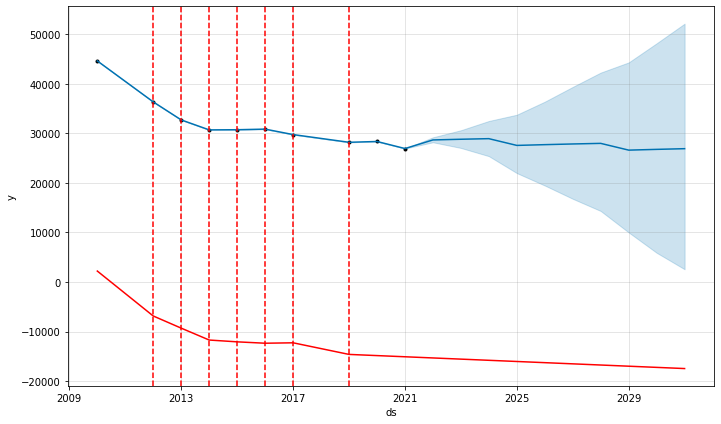

In [361]:
fig = m.plot(forecast_yearly10)
a = add_changepoints_to_plot(fig.gca(), m, forecast_yearly10)

In [362]:
print('r2 score:',r2_score(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))

r2 score: 1.0
mean absolute percentage error: 1.1721173607570884e-13
mean_absolute_error: 3.5306584322825074e-09


In [363]:
forecast_yearly20[['ds' , 'yhat']].tail(20)

ds          yhat
10 2021-12-31  28666.385791
11 2022-12-31  28805.626731
12 2023-12-31  28925.836697
13 2024-12-31  27562.374309
14 2025-12-31  27714.901720
15 2026-12-31  27854.142659
16 2027-12-31  27974.352626
17 2028-12-31  26610.890237
18 2029-12-31  26763.417648
19 2030-12-31  26902.658587
20 2031-12-31  27022.868554
21 2032-12-31  25659.406165
22 2033-12-31  25811.933576
23 2034-12-31  25951.174516
24 2035-12-31  26071.384482
25 2036-12-31  24707.922093
26 2037-12-31  24860.449505
27 2038-12-31  24999.690444
28 2039-12-31  25119.900410
29 2040-12-31  23756.438022

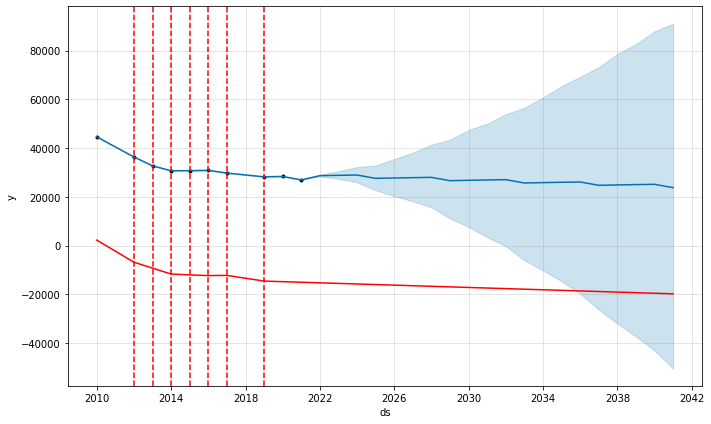

In [364]:
fig = m.plot(forecast_yearly20)
a = add_changepoints_to_plot(fig.gca(), m, forecast_yearly20)

In [365]:
print('r2 score:',r2_score(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))

r2 score: 1.0
mean absolute percentage error: 1.1721173607570884e-13
mean_absolute_error: 3.5306584322825074e-09


In [366]:
m = Prophet(changepoint_prior_scale=0.003)
m.fit(df_yearly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


In [367]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [368]:
forecast_yearly1[['ds' , 'yhat']].tail()

ds          yhat
6  2017-01-01  29747.362545
7  2019-01-01  28191.254194
8  2020-01-01  28353.656726
9  2021-01-01  26929.525033
10 2021-12-31  28666.385791

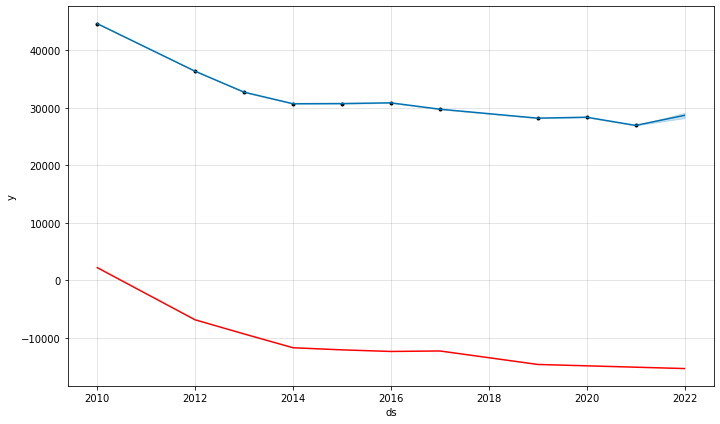

In [369]:
fig = m.plot(forecast_yearly1)
a = add_changepoints_to_plot(fig.gca(), m, forecast_yearly1)

In [370]:
print('r2 score:',r2_score(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly1_metric.y, forecast_yearly1_metric.yhat))

r2 score: 1.0
mean absolute percentage error: 1.171333946741591e-13
mean_absolute_error: 3.5284756449982523e-09


In [371]:
forecast_yearly10[['ds' , 'yhat']].tail(11)

ds          yhat
9  2021-01-01  26929.525033
10 2021-12-31  28666.385791
11 2022-12-31  28805.626731
12 2023-12-31  28925.836697
13 2024-12-31  27562.374309
14 2025-12-31  27714.901720
15 2026-12-31  27854.142659
16 2027-12-31  27974.352626
17 2028-12-31  26610.890237
18 2029-12-31  26763.417648
19 2030-12-31  26902.658587

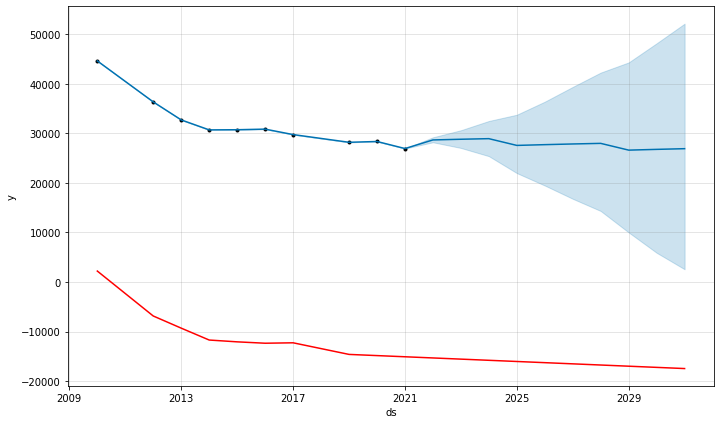

In [372]:
fig = m.plot(forecast_yearly10)
a = add_changepoints_to_plot(fig.gca(), m, forecast_yearly10)

In [373]:
print('r2 score:',r2_score(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly10_metric.y, forecast_yearly10_metric.yhat))

r2 score: 1.0
mean absolute percentage error: 1.1721173607570884e-13
mean_absolute_error: 3.5306584322825074e-09


In [374]:
forecast_yearly20[['ds' , 'yhat']].tail(21)

ds          yhat
9  2021-01-01  26929.525033
10 2021-12-31  28666.385791
11 2022-12-31  28805.626731
12 2023-12-31  28925.836697
13 2024-12-31  27562.374309
14 2025-12-31  27714.901720
15 2026-12-31  27854.142659
16 2027-12-31  27974.352626
17 2028-12-31  26610.890237
18 2029-12-31  26763.417648
19 2030-12-31  26902.658587
20 2031-12-31  27022.868554
21 2032-12-31  25659.406165
22 2033-12-31  25811.933576
23 2034-12-31  25951.174516
24 2035-12-31  26071.384482
25 2036-12-31  24707.922093
26 2037-12-31  24860.449505
27 2038-12-31  24999.690444
28 2039-12-31  25119.900410
29 2040-12-31  23756.438022

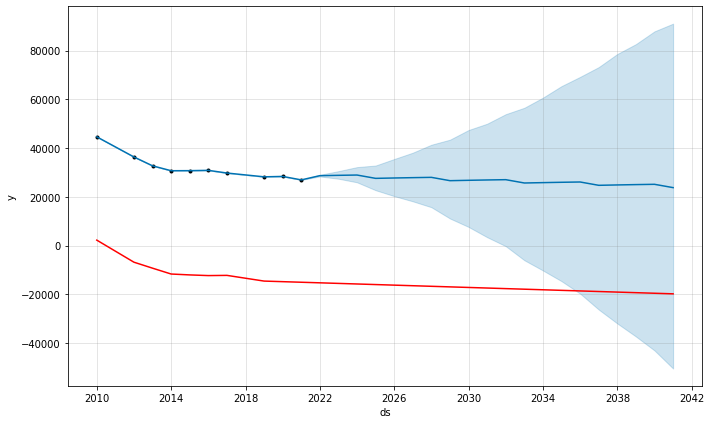

In [375]:
fig = m.plot(forecast_yearly20)
a = add_changepoints_to_plot(fig.gca(), m, forecast_yearly20)

In [376]:
print('r2 score:',r2_score(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_yearly20_metric.y, forecast_yearly20_metric.yhat))

r2 score: 1.0
mean absolute percentage error: 1.1721173607570884e-13
mean_absolute_error: 3.5306584322825074e-09


Extra Credit - Predicting all 5 Boroughs

In [377]:
df.head(1)

Development Name Borough Account Name Location Meter AMR   Meter Scope  \
0            ADAMS   BRONX        ADAMS   BLD 05      NONE  BLD 01 to 07   

   TDS #  EDP  RC Code Funding Source         AMP #               Vendor Name  \
0  118.0  248  B011800        FEDERAL  NY005001180P  NEW YORK POWER AUTHORITY   

   UMIS BILL ID Revenue Month Service Start Date Service End Date  # days  \
0       1842037    2010-01-01         2009-12-24       2010-01-26    33.0   

  Meter Number Estimated  Current Charges   Rate Class Bill Analyzed  \
0      7223256         N         15396.82  GOV/NYC/068           Yes   

   Consumption (KWH)  KWH Charges  Consumption (KW)  KW Charges  \
0             128800      7387.97             216.0      2808.0   

   Other charges  Consumption (KWH) Daily  
0        5200.85                   3903.0

In [378]:
df['Borough'].value_counts()

BROOKLYN                    138238
MANHATTAN                    93082
BRONX                        82782
QUEENS                       42449
STATEN ISLAND                 2776
NON DEVELOPMENT FACILITY      1940
FHA                           1363
Name: Borough, dtype: int64

In [379]:
bk = df[df['Borough'] == 'BROOKLYN']
queens = df[df['Borough'] == 'QUEENS']
manhattan = df[df['Borough'] == 'MANHATTAN']
bronx = df[df['Borough'] == 'BRONX']
staten_island = df[df['Borough'] == 'STATEN ISLAND']

In [380]:
bk_monthly = bk.groupby(pd.PeriodIndex(bk['Revenue Month'], freq="M"))['Consumption (KWH)'].mean().reset_index().rename(columns = {'Consumption (KWH)' : 'y'})
bk_monthly['Revenue Month'] = bk_monthly['Revenue Month'].apply(lambda i: str(i).replace(' M', '')).apply(lambda i: pd.to_datetime(i))
bk_monthly = bk_monthly .rename(columns = {'Revenue Month': 'ds'})

queens_monthly = queens.groupby(pd.PeriodIndex(queens['Revenue Month'], freq="M"))['Consumption (KWH)'].mean().reset_index().rename(columns = {'Consumption (KWH)' : 'y'})
queens_monthly['Revenue Month'] = queens_monthly['Revenue Month'].apply(lambda i: str(i).replace(' M', '')).apply(lambda i: pd.to_datetime(i))
queens_monthly = queens_monthly .rename(columns = {'Revenue Month': 'ds'})


manhattan_monthly = manhattan.groupby(pd.PeriodIndex(manhattan['Revenue Month'], freq="M"))['Consumption (KWH)'].mean().reset_index().rename(columns = {'Consumption (KWH)' : 'y'})
manhattan_monthly['Revenue Month'] = manhattan_monthly['Revenue Month'].apply(lambda i: str(i).replace(' M', '')).apply(lambda i: pd.to_datetime(i))
manhattan_monthly = manhattan_monthly .rename(columns = {'Revenue Month': 'ds'})


bronx_monthly = bronx.groupby(pd.PeriodIndex(bronx['Revenue Month'], freq="M"))['Consumption (KWH)'].mean().reset_index().rename(columns = {'Consumption (KWH)' : 'y'})
bronx_monthly['Revenue Month'] = bronx_monthly['Revenue Month'].apply(lambda i: str(i).replace(' M', '')).apply(lambda i: pd.to_datetime(i))
bronx_monthly = bronx_monthly .rename(columns = {'Revenue Month': 'ds'})


staten_island_monthly = staten_island.groupby(pd.PeriodIndex(staten_island['Revenue Month'], freq="M"))['Consumption (KWH)'].mean().reset_index().rename(columns = {'Consumption (KWH)' : 'y'})
staten_island_monthly['Revenue Month'] = staten_island_monthly['Revenue Month'].apply(lambda i: str(i).replace(' M', '')).apply(lambda i: pd.to_datetime(i))
staten_island_monthly = staten_island_monthly .rename(columns = {'Revenue Month': 'ds'})


Brooklyn

In [381]:
m = Prophet()
m.fit(bk_monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [382]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [383]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds          yhat
106 2020-11-01  19208.935634
107 2020-12-01  22320.661159
108 2021-01-01  22673.095070
109 2021-02-01  20576.265123
110 2021-02-28  17746.520589

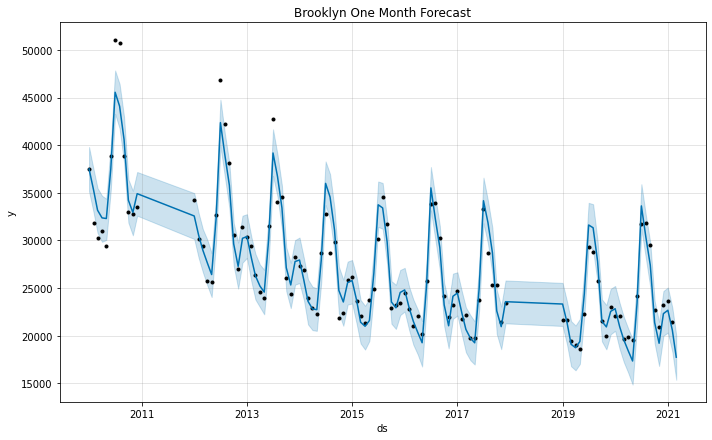

In [384]:
fig1 = m.plot(forecast_monthly1)
plt.title('Brooklyn One Month Forecast');

In [385]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: 0.44794968195281104
mean absolute percentage error: 0.15518110885887026
mean_absolute_error: 5128.907167613512


In [386]:
forecast_monthly6[['ds' , 'yhat']].tail(7)

ds          yhat
109 2021-02-01  20576.265123
110 2021-02-28  17746.520589
111 2021-03-31  17959.246737
112 2021-04-30  19700.361945
113 2021-05-31  23933.973146
114 2021-06-30  29205.007224
115 2021-07-31  30955.477286

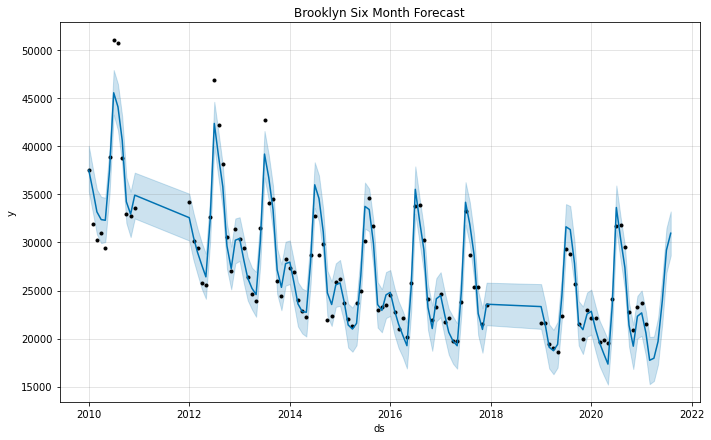

In [387]:
fig1 = m.plot(forecast_monthly6)
plt.title('Brooklyn Six Month Forecast');

In [388]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: 0.44794968195281104
mean absolute percentage error: 0.15518110885887026
mean_absolute_error: 5128.907167613512


In [389]:
forecast_monthly9[['ds' , 'yhat']].tail(10)

ds          yhat
109 2021-02-01  20576.265123
110 2021-02-28  17746.520589
111 2021-03-31  17959.246737
112 2021-04-30  19700.361945
113 2021-05-31  23933.973146
114 2021-06-30  29205.007224
115 2021-07-31  30955.477286
116 2021-08-31  27034.607252
117 2021-09-30  20563.851405
118 2021-10-31  21012.290681

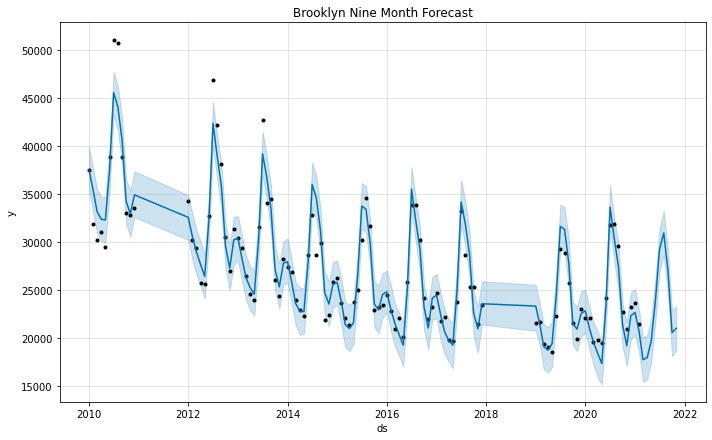

In [390]:
fig1 = m.plot(forecast_monthly9)
plt.title('Brooklyn Nine Month Forecast');

In [391]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: 0.44794968195281104
mean absolute percentage error: 0.15518110885887026
mean_absolute_error: 5128.907167613512


Queens


In [392]:
m = Prophet()
m.fit(queens_monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [393]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [394]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds          yhat
106 2020-11-01  16805.443661
107 2020-12-01  18642.375850
108 2021-01-01  20651.649925
109 2021-02-01  17316.175592
110 2021-02-28  16308.391909

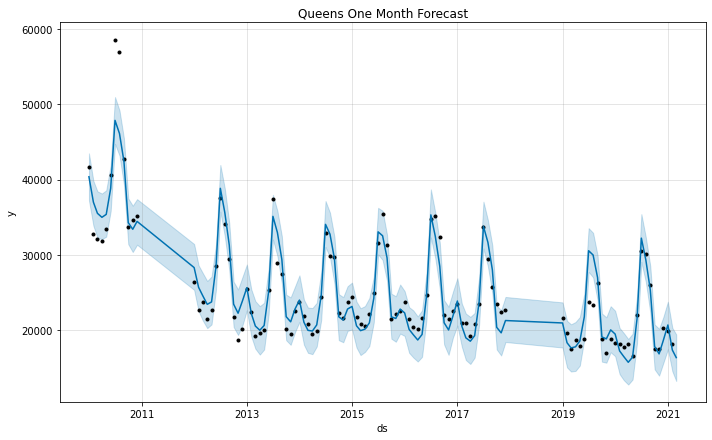

In [395]:
fig1 = m.plot(forecast_monthly1)
plt.title('Queens One Month Forecast');

In [396]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: 0.047522833214716176
mean absolute percentage error: 0.2270340119948438
mean_absolute_error: 7233.536809312384


In [397]:
forecast_monthly6[['ds' , 'yhat']].tail(7)

ds          yhat
109 2021-02-01  17316.175592
110 2021-02-28  16308.391909
111 2021-03-31  17018.851200
112 2021-04-30  17749.545586
113 2021-05-31  19682.717044
114 2021-06-30  27288.160126
115 2021-07-31  28351.133229

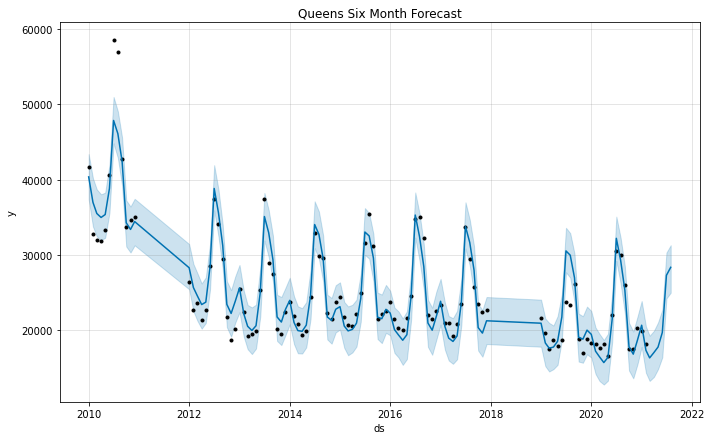

In [398]:
fig1 = m.plot(forecast_monthly6)
plt.title('Queens Six Month Forecast');

In [399]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: 0.047522833214716176
mean absolute percentage error: 0.2270340119948438
mean_absolute_error: 7233.536809312384


In [400]:
forecast_monthly9[['ds' , 'yhat']].tail(10)

ds          yhat
109 2021-02-01  17316.175592
110 2021-02-28  16308.391909
111 2021-03-31  17018.851200
112 2021-04-30  17749.545586
113 2021-05-31  19682.717044
114 2021-06-30  27288.160126
115 2021-07-31  28351.133229
116 2021-08-31  25984.948932
117 2021-09-30  17808.883610
118 2021-10-31  17981.422819

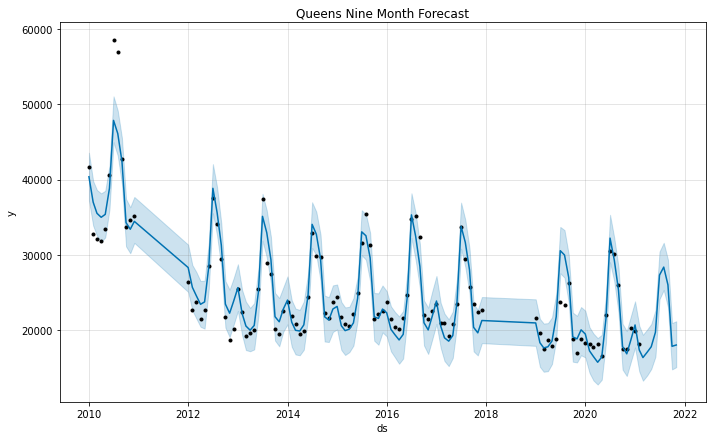

In [401]:
fig1 = m.plot(forecast_monthly9)
plt.title('Queens Nine Month Forecast');

In [402]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: 0.047522833214716176
mean absolute percentage error: 0.2270340119948438
mean_absolute_error: 7233.536809312384


Manhattan

In [403]:
m = Prophet()
m.fit(manhattan_monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [404]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [405]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds          yhat
106 2020-11-01  28578.512098
107 2020-12-01  32059.076603
108 2021-01-01  32271.441936
109 2021-02-01  29813.785759
110 2021-02-28  27326.933118

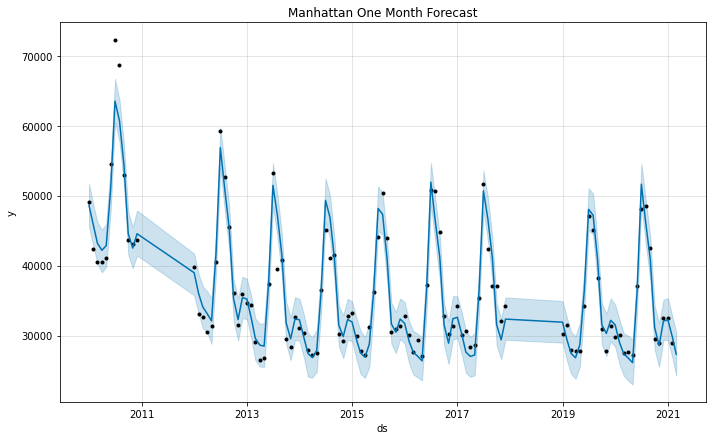

In [406]:
fig1 = m.plot(forecast_monthly1)
plt.title('Manhattan One Month Forecast');

In [407]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: 0.6347747447498164
mean absolute percentage error: 0.12476698860408843
mean_absolute_error: 4001.5725515608538


In [408]:
forecast_monthly6[['ds' , 'yhat']].tail(7)

ds          yhat
109 2021-02-01  29813.785759
110 2021-02-28  27326.933118
111 2021-03-31  26683.183625
112 2021-04-30  30140.053558
113 2021-05-31  36227.661767
114 2021-06-30  45393.751862
115 2021-07-31  47843.069558

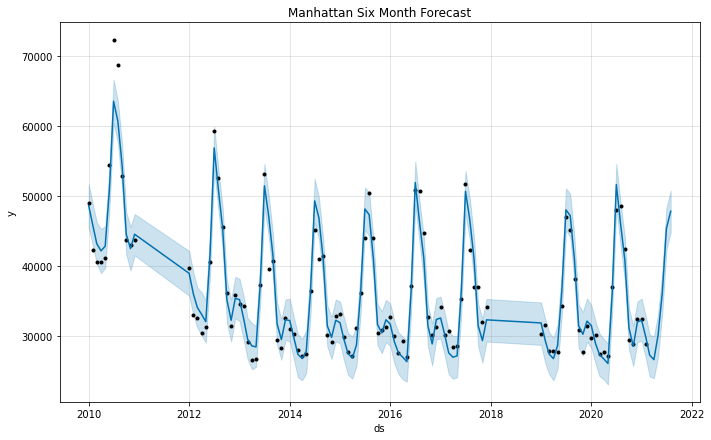

In [409]:
fig1 = m.plot(forecast_monthly6)
plt.title('Manhattan Six Month Forecast');

In [410]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: 0.6347747447498164
mean absolute percentage error: 0.12476698860408843
mean_absolute_error: 4001.5725515608538


In [411]:
forecast_monthly9[['ds' , 'yhat']].tail(10)

ds          yhat
109 2021-02-01  29813.785759
110 2021-02-28  27326.933118
111 2021-03-31  26683.183625
112 2021-04-30  30140.053558
113 2021-05-31  36227.661767
114 2021-06-30  45393.751862
115 2021-07-31  47843.069558
116 2021-08-31  40709.440893
117 2021-09-30  31548.339170
118 2021-10-31  31216.271640

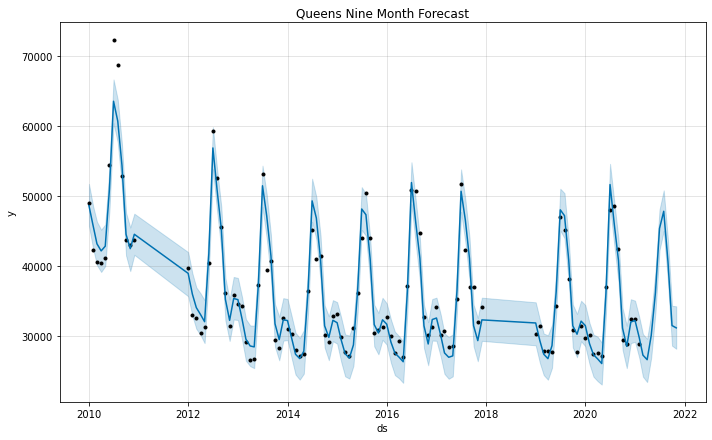

In [412]:
fig1 = m.plot(forecast_monthly9)
plt.title('Queens Nine Month Forecast');

In [413]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: 0.6347747447498164
mean absolute percentage error: 0.12476698860408843
mean_absolute_error: 4001.5725515608538


Bronx

In [414]:
m = Prophet()
m.fit(bronx_monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [415]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [416]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds          yhat
106 2020-11-01  28867.443967
107 2020-12-01  32003.553097
108 2021-01-01  32276.403856
109 2021-02-01  29800.959097
110 2021-02-28  26889.693128

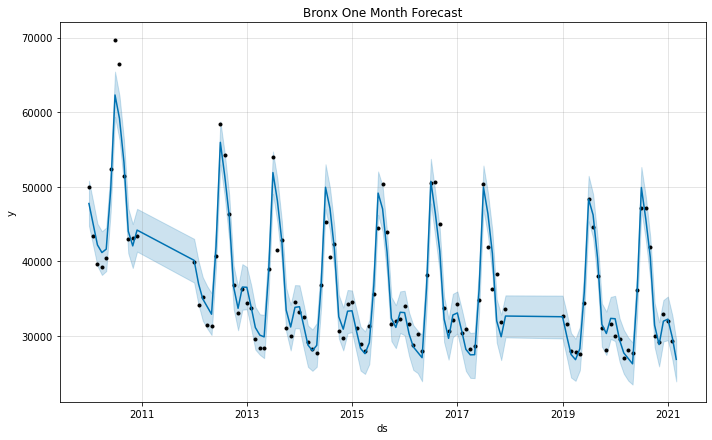

In [417]:
fig1 = m.plot(forecast_monthly1)
plt.title('Bronx One Month Forecast');

In [418]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: 0.6048300455999307
mean absolute percentage error: 0.13995317344500355
mean_absolute_error: 4420.591991176619


In [419]:
forecast_monthly6[['ds' , 'yhat']].tail(7)

ds          yhat
109 2021-02-01  29800.959097
110 2021-02-28  26889.693128
111 2021-03-31  26250.463218
112 2021-04-30  29112.822413
113 2021-05-31  35538.499402
114 2021-06-30  46732.447146
115 2021-07-31  46098.075011

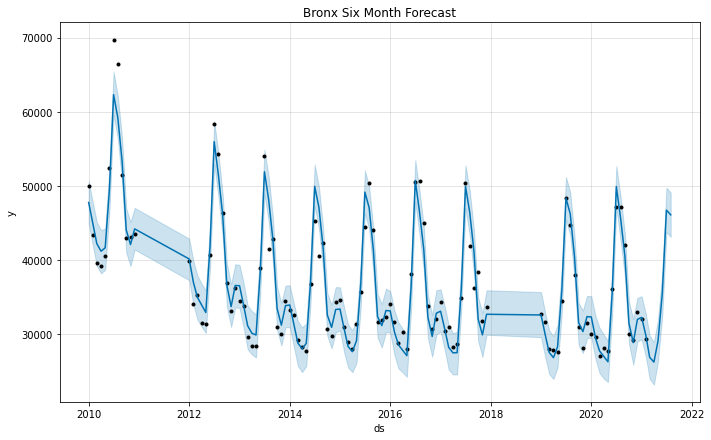

In [420]:
fig1 = m.plot(forecast_monthly6)
plt.title('Bronx Six Month Forecast');

In [421]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: 0.6048300455999307
mean absolute percentage error: 0.13995317344500355
mean_absolute_error: 4420.591991176619


In [422]:
forecast_monthly9[['ds' , 'yhat']].tail(10)

ds          yhat
109 2021-02-01  29800.959097
110 2021-02-28  26889.693128
111 2021-03-31  26250.463218
112 2021-04-30  29112.822413
113 2021-05-31  35538.499402
114 2021-06-30  46732.447146
115 2021-07-31  46098.075011
116 2021-08-31  39826.905332
117 2021-09-30  31150.393455
118 2021-10-31  30803.232975

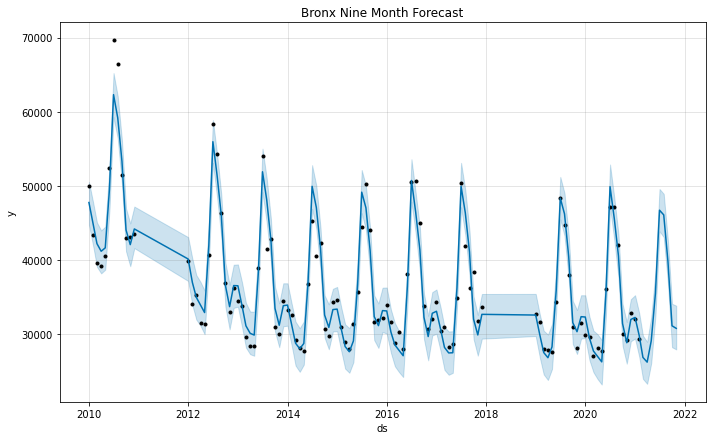

In [423]:
fig1 = m.plot(forecast_monthly9)
plt.title('Bronx Nine Month Forecast');

In [424]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: 0.6048300455999307
mean absolute percentage error: 0.13995317344500355
mean_absolute_error: 4420.591991176619


Staten Island

In [425]:
m = Prophet()
m.fit(staten_island_monthly)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [426]:
future_monthly1 = m.make_future_dataframe(periods=1, freq = 'M')
future_monthly6 = m.make_future_dataframe(periods=6, freq = 'M')
future_monthly9 = m.make_future_dataframe(periods=9, freq = 'M')

forecast_monthly1 = m.predict(future_monthly1)
forecast_monthly1_metric = forecast_monthly1.merge(df_monthly, on = 'ds')
forecast_monthly6 = m.predict(future_monthly6)
forecast_monthly6_metric = forecast_monthly6.merge(df_monthly, on = 'ds')
forecast_monthly9 = m.predict(future_monthly9)
forecast_monthly9_metric = forecast_monthly9.merge(df_monthly, on = 'ds')

In [427]:
forecast_monthly1[['ds' , 'yhat']].tail()

ds           yhat
106 2020-11-01   91090.821315
107 2020-12-01  103023.551142
108 2021-01-01  107545.470569
109 2021-02-01  101727.299486
110 2021-02-28   94245.703293

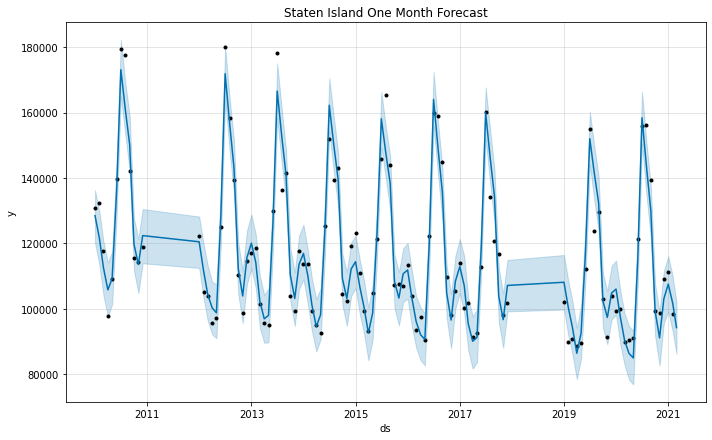

In [428]:
fig1 = m.plot(forecast_monthly1)
plt.title('Staten Island One Month Forecast');

In [429]:
print('r2 score:',r2_score(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly1_metric.y, forecast_monthly1_metric.yhat))

r2 score: -118.82153511550679
mean absolute percentage error: 2.6528208420104833
mean_absolute_error: 84553.52207747845


In [430]:
forecast_monthly6[['ds' , 'yhat']].tail(7)

ds           yhat
109 2021-02-01  101727.299486
110 2021-02-28   94245.703293
111 2021-03-31   83576.551184
112 2021-04-30   94589.283887
113 2021-05-31  115825.188354
114 2021-06-30  144571.207905
115 2021-07-31  137571.410308

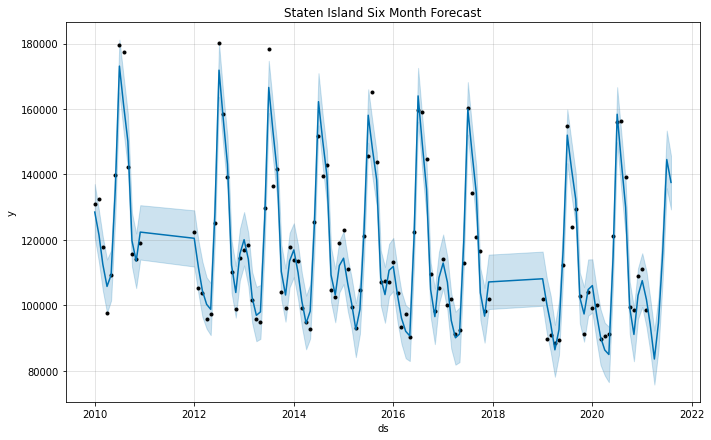

In [431]:
fig1 = m.plot(forecast_monthly6)
plt.title('Staten Island Six Month Forecast');

In [432]:
print('r2 score:',r2_score(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly6_metric.y, forecast_monthly6_metric.yhat))

r2 score: -118.82153511550679
mean absolute percentage error: 2.6528208420104833
mean_absolute_error: 84553.52207747845


In [433]:
forecast_monthly9[['ds' , 'yhat']].tail(10)

ds           yhat
109 2021-02-01  101727.299486
110 2021-02-28   94245.703293
111 2021-03-31   83576.551184
112 2021-04-30   94589.283887
113 2021-05-31  115825.188354
114 2021-06-30  144571.207905
115 2021-07-31  137571.410308
116 2021-08-31  131192.243331
117 2021-09-30  101603.022586
118 2021-10-31   98465.626203

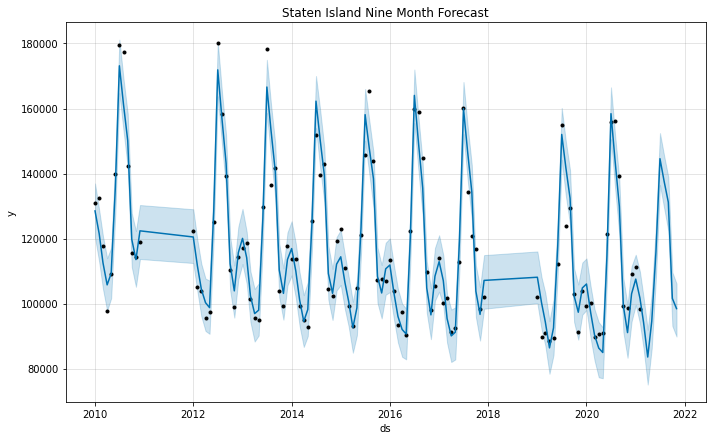

In [434]:
fig1 = m.plot(forecast_monthly9)
plt.title('Staten Island Nine Month Forecast');

In [435]:
print('r2 score:',r2_score(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean absolute percentage error:', mean_absolute_percentage_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))
print('mean_absolute_error:',mean_absolute_error(forecast_monthly9_metric.y, forecast_monthly9_metric.yhat))

r2 score: -118.82153511550679
mean absolute percentage error: 2.6528208420104833
mean_absolute_error: 84553.52207747845
